## Figure notebook for annotating multiomic (RNA+ATAC-seq) datasets (from neurips 2021, S1D1 multiome)

Last updated: 3/7/2023

Author: Yang-Joon Kim

Notse: 
- We will use the neurips 2021, s1d1 (RNA+ATAC) objects - both RNA and ADT modalities(assays)
- Note that the adata.X is normalized differently for RNA and ADT (RNA is log-normalized, whereas ADT is centered-log-ratio transformed). Raw counts are saved in the "counts" layer.
- We will use a subset of cell-types for UMAP visualizations for simplicity
- We used two different color palettes for RNA and ADT to make those look visually distinctive.
- RNA: Set1 (default) and viridis (continuous), ADT: Set2 and magma (continuous)
- [NOT DONE YET] We will generate the whole figure using matplotlib (following Jonathan's Jupyter notebooks).


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default

# Editable text and proper LaTeX fonts in illustrator
# matplotlib.rcParams['ps.useafm'] = True
# Editable fonts. 42 is the magic number
mpl.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
# mpl.rcParams['mathtext.fontset'] = 'cm'
# %matplotlib inline
# change font (for texts)
# mpl.rcParams['font.sans-serif'] = "Arial"
# mpl.rcParams['font.family'] = "sans-serif"

sns.set(style='whitegrid', context='paper')

# ignore warnings regarding fonts
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')


In [2]:
# load utilities module
import sys
sys.path.append("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/celltype_annotation_tutorial/utilities/")
import color_schema

In [3]:
# define the figure path
figpath = "/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/celltype_annotation_tutorial/figures/Figure_RNA_ATAC_multiome/"
sc.settings.figdir = figpath
# set_plotting_style()

# Load the data object

In [36]:
adata = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v4.h5ad")
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
# import packages
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
from scipy import sparse



In [98]:
adata_cxg = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/github_repos/excellxgene/umap_WNN_seurat.h5ad")
adata_cxg

AnnData object with n_obs × n_vars = 6224 × 36271
    obs: 'name_0', 'manual_annotation_B_fine', 'cell_type_RNA', 'nCount_peaks', 'joint_leiden_05', 'ATAC_leiden_015', 'blacklist_fraction', 'GEX_leiden_015', 'atac_fragments', 'pct_counts_mt', 'leiden_final', 'n_genes', 'atac_ann', 'manual_annotation_fine', 'rna_ann', 'manual_annotation_coarse', 'cell_type_ATAC', 'n_genes_by_counts', 'joint_leiden_025', 'joint_leiden_015', 'phase', 'n_counts', 'nucleosome_signal', 'reads_in_peaks_frac', 'cell_type', 'size_factors'
    var: 'name_0', 'assay', 'variance', 'mean'
    uns: 'N_pca_RNA_params', 'N_pca_params', 'N_umap_ATAC_params', 'N_umap_RNA_params', 'N_umap_WNN_muon_params', 'N_umap_WNN_seurat_params', 'N_umap_params'
    obsm: 'X_latent_pca', 'X_latent_pca_RNA', 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    layers: 'X'
    obsp: 'N_pca', 'N_pca_RNA', 'N_umap', 'N_umap_ATAC', 'N_umap_RNA', 'N_umap_WNN_muon', 'N_umap_WNN_seurat'

In [44]:
# another h5ad object converted from Seurat object (with WNN UMAP) 
adata_leiden = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/lsi.h5ad")
adata_leiden

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


AnnData object with n_obs × n_vars = 6224 × 117161
    obs: 'name_0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters', 'X', 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_025'
    var: 'name_0', 'count', 'percentile', 'mean', 'variance'
    obsm: 'X_latent_lsi', 'X_lsi', 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap'
    layers: 'X'

In [42]:
adata.obs_keys()

adata_cxg.obs_keys()

['name_0',
 'manual_annotation_B_fine',
 'cell_type_RNA',
 'nCount_peaks',
 'joint_leiden_05',
 'ATAC_leiden_015',
 'blacklist_fraction',
 'GEX_leiden_015',
 'atac_fragments',
 'pct_counts_mt',
 'leiden_final',
 'n_genes',
 'atac_ann',
 'manual_annotation_fine',
 'rna_ann',
 'manual_annotation_coarse',
 'cell_type_ATAC',
 'n_genes_by_counts',
 'joint_leiden_015',
 'phase',
 'n_counts',
 'nucleosome_signal',
 'reads_in_peaks_frac',
 'cell_type',
 'size_factors']

In [43]:
set(adata_cxg.obs_keys()) - set(adata.obs_keys())

{'manual_annotation_B_fine', 'name_0'}

In [99]:
# copy over the annotations from anndata objects after exCellxgene annotation
# for leiden clustering on joint embedding (neighborhoods from WNN)
adata.obs["joint_leiden_025"] = adata_leiden.obs["joint_leiden_025"]
# for manual annotation for B cell population
adata.obs["manual_annotation_coarse"] = adata_cxg.obs["manual_annotation_coarse"]
adata.obs["manual_annotation_fine"] = adata_cxg.obs["manual_annotation_fine"]
adata.obs["manual_annotation_B_fine"] = adata_cxg.obs["manual_annotation_B_fine"]

In [51]:
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [100]:
adata.write_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v5.h5ad")

In [ ]:
# Load the main anndata object
adata = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v5.h5ad")

## Figure scheme

- (A): 
- (B): 
- (C): 
- (D):
- (E):


### markers from neurips 2021 annotation

In [7]:
# # marker genes for RNA
# marker_genes = {
#     'CD14+ Mono': ['FCN1', 'CD14'],
#     'CD16+ Mono': ['TCF7L2', 'FCGR3A', 'LYN'],
#     'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'FOS', 'JUN', 'EGR1', 'KLF4', 'PLAUR'],
#     'cDC1': ['CLEC9A', 'CADM1'],
#     'cDC2': ['CLEC10A', 'FCER1A', 'CST3', 'COTL1', 'LYZ', 'DMXL2'], # Note: DMXL2 should be negative
#     'Reticulocyte': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'], # TFRC negative
#     'Normoblast': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'],  # TFRC positive
#     'Erythroblast': ['MKI67', 'HBA1', 'HBB'],
#     'Proerythroblast': ['CDK6', 'SYNGR1', 'HBM', 'GYPA'], # Note HBM and GYPA are negative markers   # CRACD as well, but not present in data
#     'NK': ['GNLY', 'NKG7', 'CD247', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A'], # GRIK4 as well, but not present in data
#     'ILC': ['ID2', 'PLCG2', 'GNLY', 'SYNE1'],
#     'Lymph prog': ['IGLL1', 'VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT'],  # new: STMN1
#     'Naive CD20+ B - IGKC+':['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM', 'IGKC'],
#     'Naive CD20+ B - IGKC-':['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM', 'IGKC'], # IGKC negative
#     'B1 B - IGKC+':['MS4A1', 'SSPN', 'ITGB1','IGKC', 'EPHA4', 'COL4A4', 'PRDM1', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'],# Note IGHD and IGHM are negative markers #ZNF215 not in data
#     'B1 B - IGKC-':['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM', 'IGKC'],# Note IGKC, IGHD and IGHM are negative markers #ZNF215 not in data
#     'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
#     'Plasma cell': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
#     'Plasmablast': ['XBP1', 'PRDM1', 'PAX5'],  # Note PAX5 is a negative marker   # RF4 as well, but not present in data
#     'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
#     'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
#     'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
#     'T activation': ['CD69', 'CD38'], # CD69 much better marker!
#     'T naive': ['LEF1', 'CCR7', 'TCF7'],
#     'T reg': ['FOXP3'],
#     'Effector CD4+ T': ['KLRB1', 'CD4', 'PDCD1', 'TNF'],
#     'Effector CD8+ T': ['KLRK1', 'GZMH', 'CD8A', 'CD8B'],
#     'MAIT': ['KLRB1', 'CD8A', 'GZMK', 'IL7R'],
#     'gdT': ['KLRC2', 'KLRF1', 'FCGR3A', 'GZMB', 'GZMH'],
#     'pDC': ['GZMB', 'IL3RA', 'COBLL1', 'TCF4'],
#     'G/M prog': ['MPO', 'BCL2', 'KCNQ5', 'CSF3R', 'PRTN3'], 
#     'HSC': ['NRIP1', 'MECOM', 'PROM1', 'CD34', 'NKAIN2'], 
#     'MK/E prog': ['ZNF385D', 'ITGA2B', 'PLCB1'], # 'RYR3' as well,  but not present in data
# }


In [8]:
# #ATAC
# marker_genes_atac = {
#     'CD14+ Mono': ['TREM1', 'FPR1'],
#     'CD16+ Mono': ['LYN', 'TCF7L2'],
#     'ID2-hi myeloid prog': ['KLF4'],
#     'cDC2': ['TREM1', 'DMXL2'], # Note: DMXL2 should be negative
#     'Reticulocyte': ['GATA1', 'HBA1', 'SLC4A1', 'SLC25A37', 'KLF1'],
#     'Erythroblast': ['GATA1', 'MKI67'],
#     'Proerythroblast': ['GATA2', 'CRACD', 'SYNGR1'],
#     'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247'],
#     'ILC': ['SPON2', 'GZMB', 'PRF1', 'C69'], # Note CD69 should be negative
#     'Lymph prog': ['MME', 'IGLL1', 'VPREB1', 'CD79B'],
#     'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
#     'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
#     'Transitional B': ['MME', 'CD38', 'CD24'],
#     'Plasma cells': ['DUSP22', 'FNDC3B'],
#     'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
#     'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative markers
#     'CD8+ T': ['CD8A', 'CD8B'],
#     'pDCs': ['PTPRS', 'TCF4', 'KCNN3', 'DUSP22'],
#     'G/M prog': ['MPO','NT5DC3'],
#     'HSC': ['PRDM16','TAMALIN','MTRNR2L1'],
#     'MK/E prog': ['DNAJC6']
# }

# UMAP plots with different labels/annotations

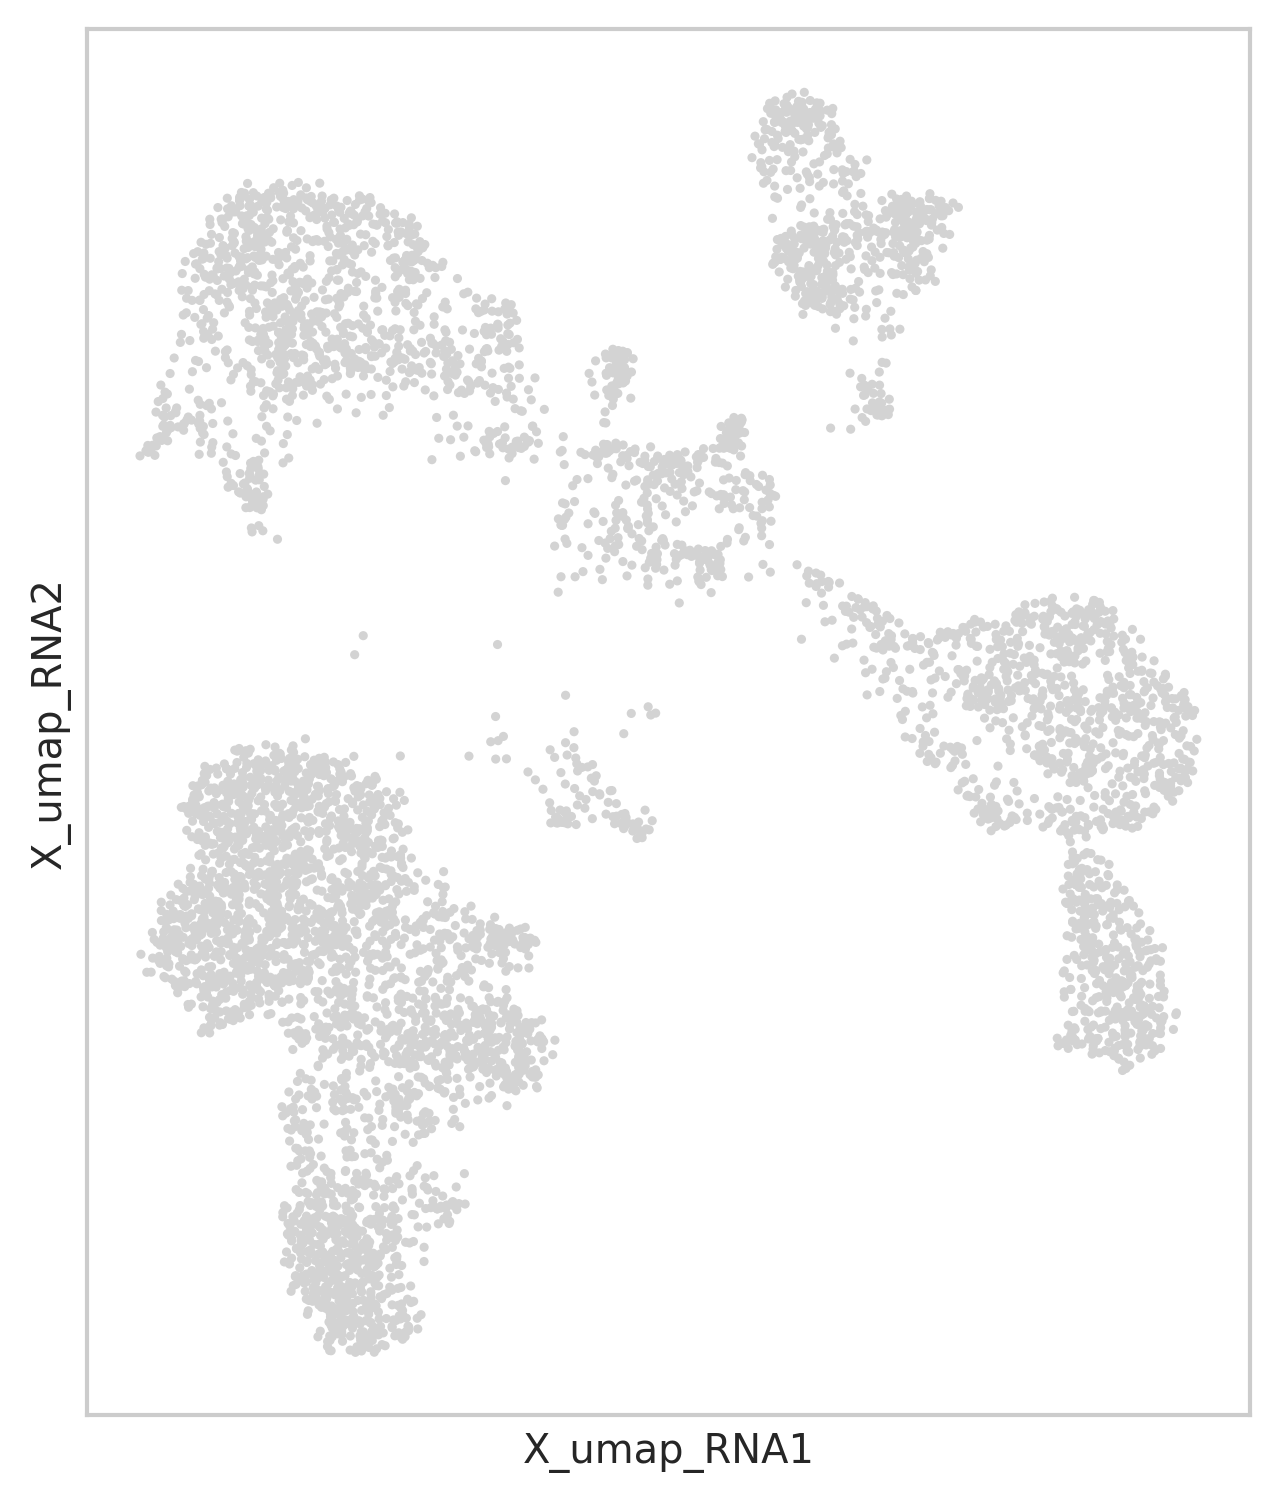

In [7]:
# plot the RNA UMAP without any labels
with plt.rc_context({"figure.figsize": (5, 6), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA" ,legend_fontsize=8, save="_no_color.pdf")

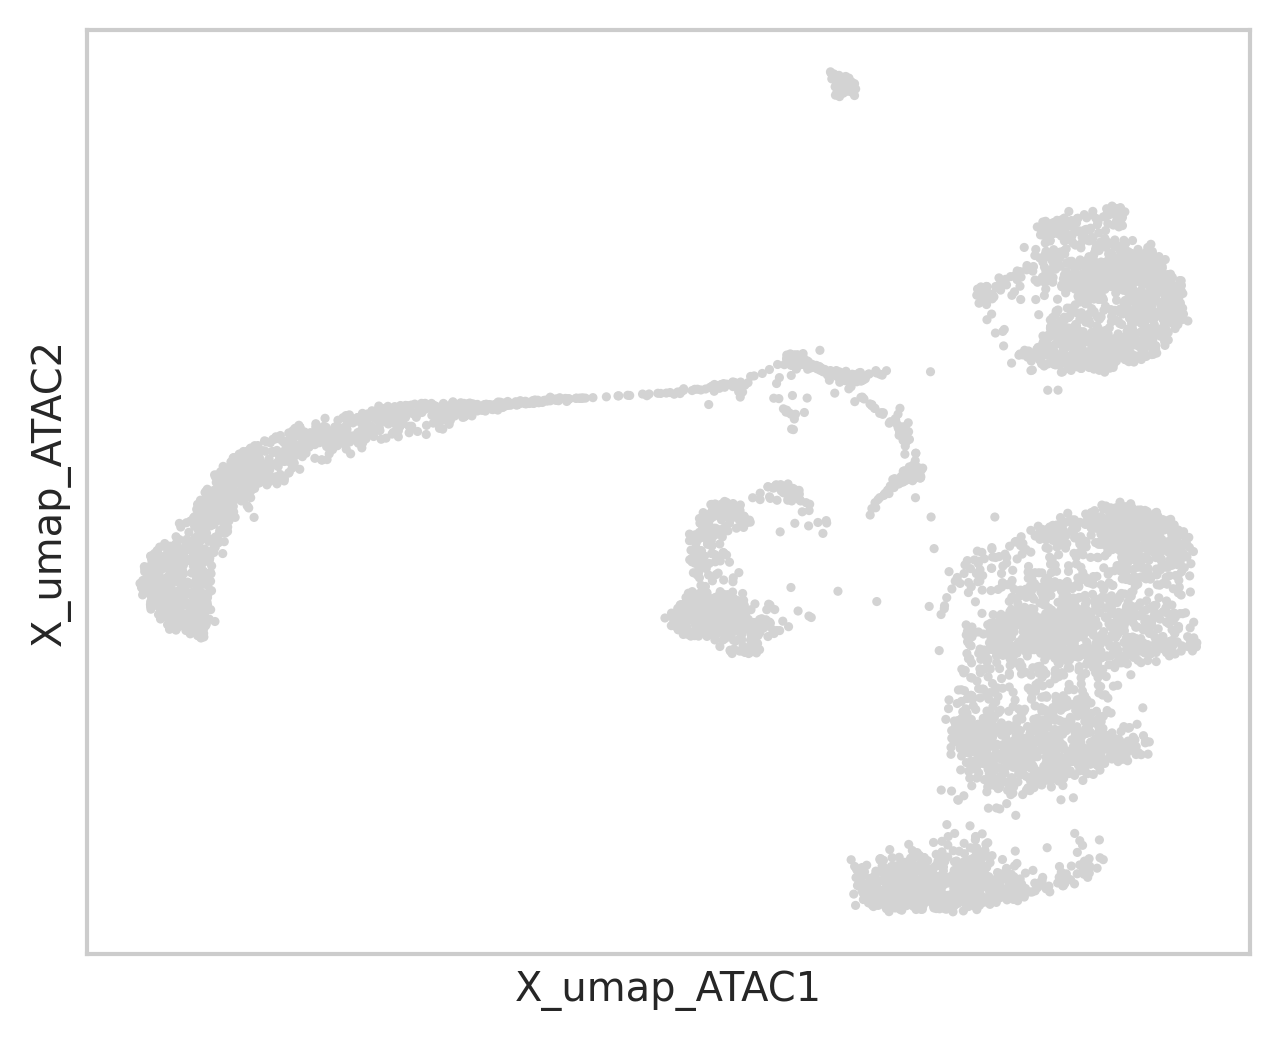

In [8]:
# plot the ATAC UMAP without any labels
with plt.rc_context({"figure.figsize": (5, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC" ,legend_fontsize=8,save="_no_color.pdf")

# Leiden clustering on GEX and ATAC

- We performed leiden clustering on exCellxgene for GEX and ATAC, respectively. Then, we exported the clustering results to adata.obs with different resolutions.
- We will use the leiden resolution of 0.15 as that gave us reasonable number of clusters for the initial inspectioin of the data.



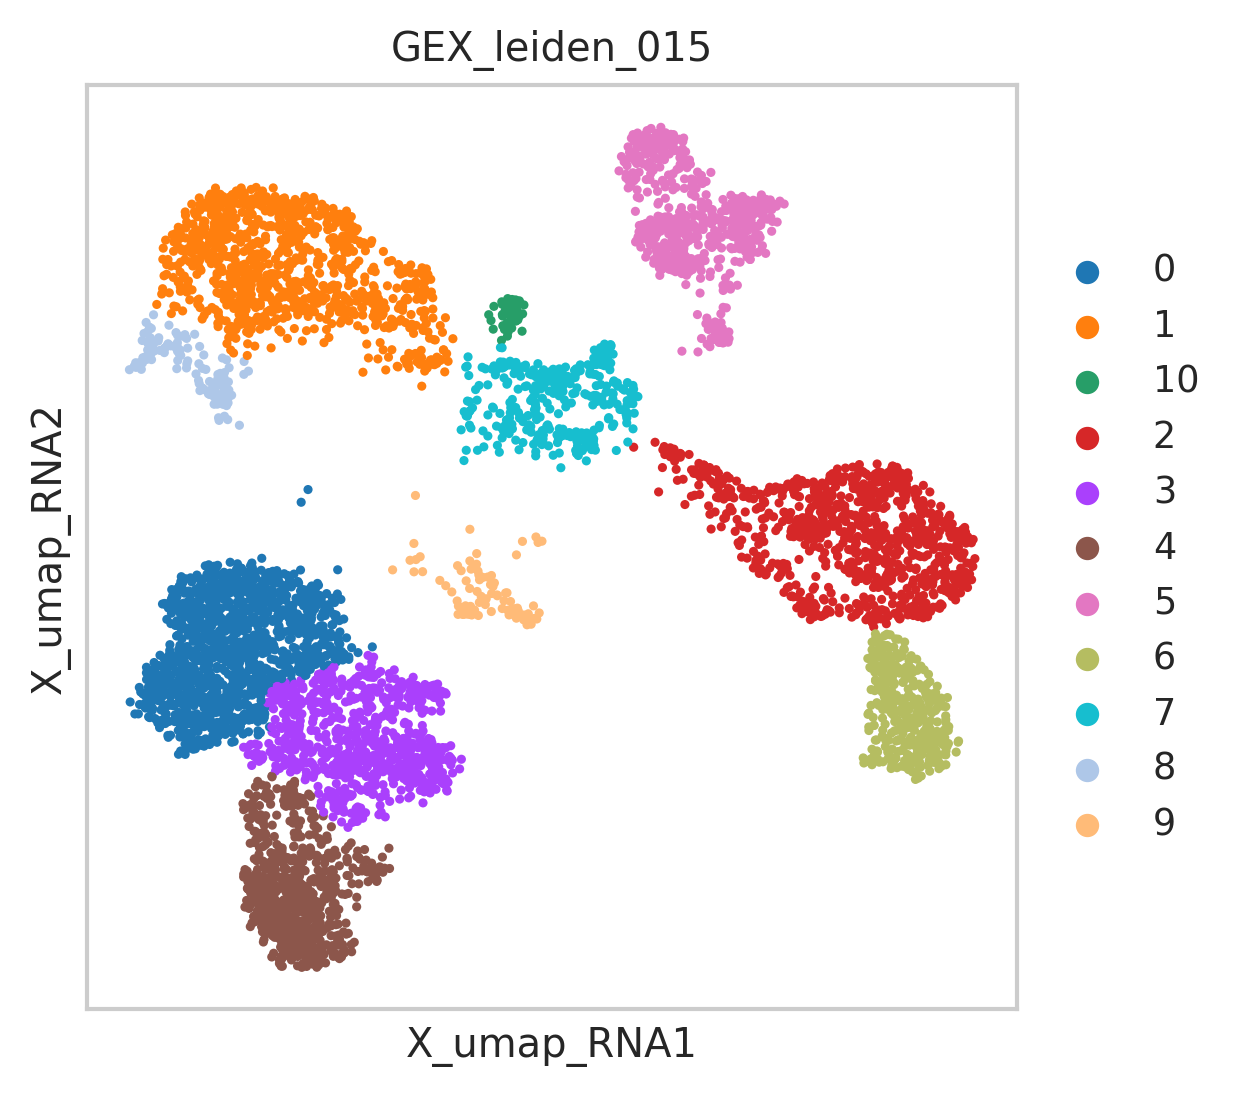

In [19]:
# GEX UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="GEX_leiden_015",
                    save="_leiden_GEX_015.pdf")

In [118]:
# redefine the colormap in ATAC as Dark2 only has 8 colors.
# We got the 9th color from ChatGPT's suggestion of purple-themed color that matches with the Dark2 style.

# define the Dark2 color palette
# dark2 = plt.get_cmap('Dark2').colors
dark2 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

# add new colors to the palette
new_colors = ['#A95C68', '#587B7F', '#8B6D9C']
dark2_extended = dark2 + new_colors

In [20]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('GEX_leiden_015_colors', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'])])
With overloaded keys:
	['neighbors'].

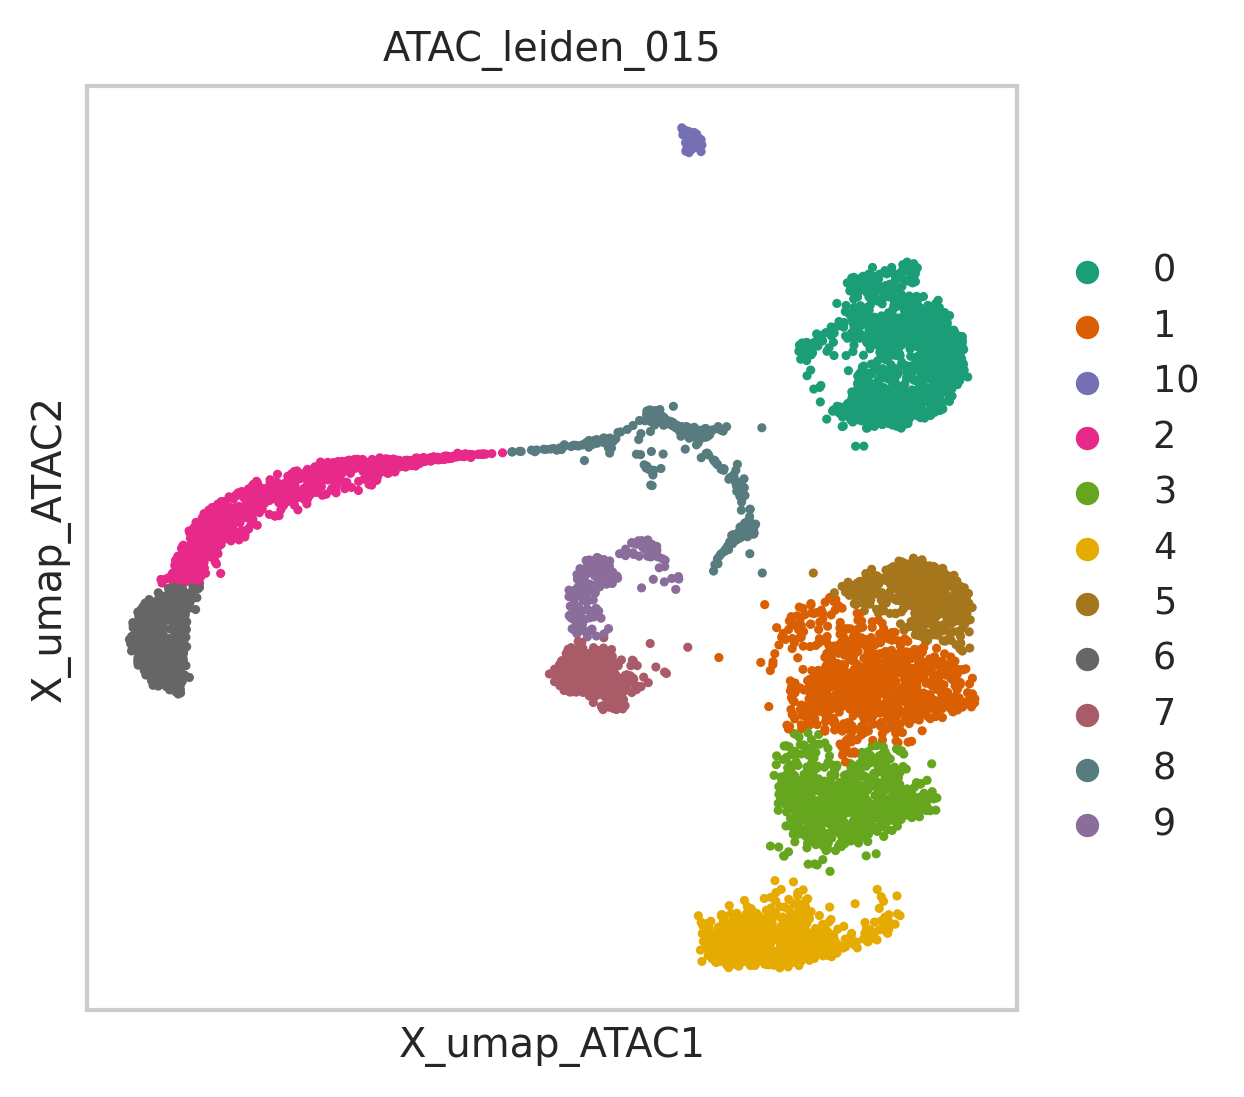

In [23]:
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="ATAC_leiden_015", palette=dark2_extended,
                    save="_leiden_ATAC_015.pdf")

In [266]:
set3_colors

[(0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432)]

In [94]:
# generate a new colormap for the joint embedding visualization
set3_colors = sns.color_palette("Set3", 12)
set3_colors = set3_colors[2:-1]
tab10_colors = sns.color_palette("tab10", 8)
merged_colors = set3_colors+ tab10_colors#np.concatenate((set3_colors, tab10_colors))
merged_colors

[(0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862

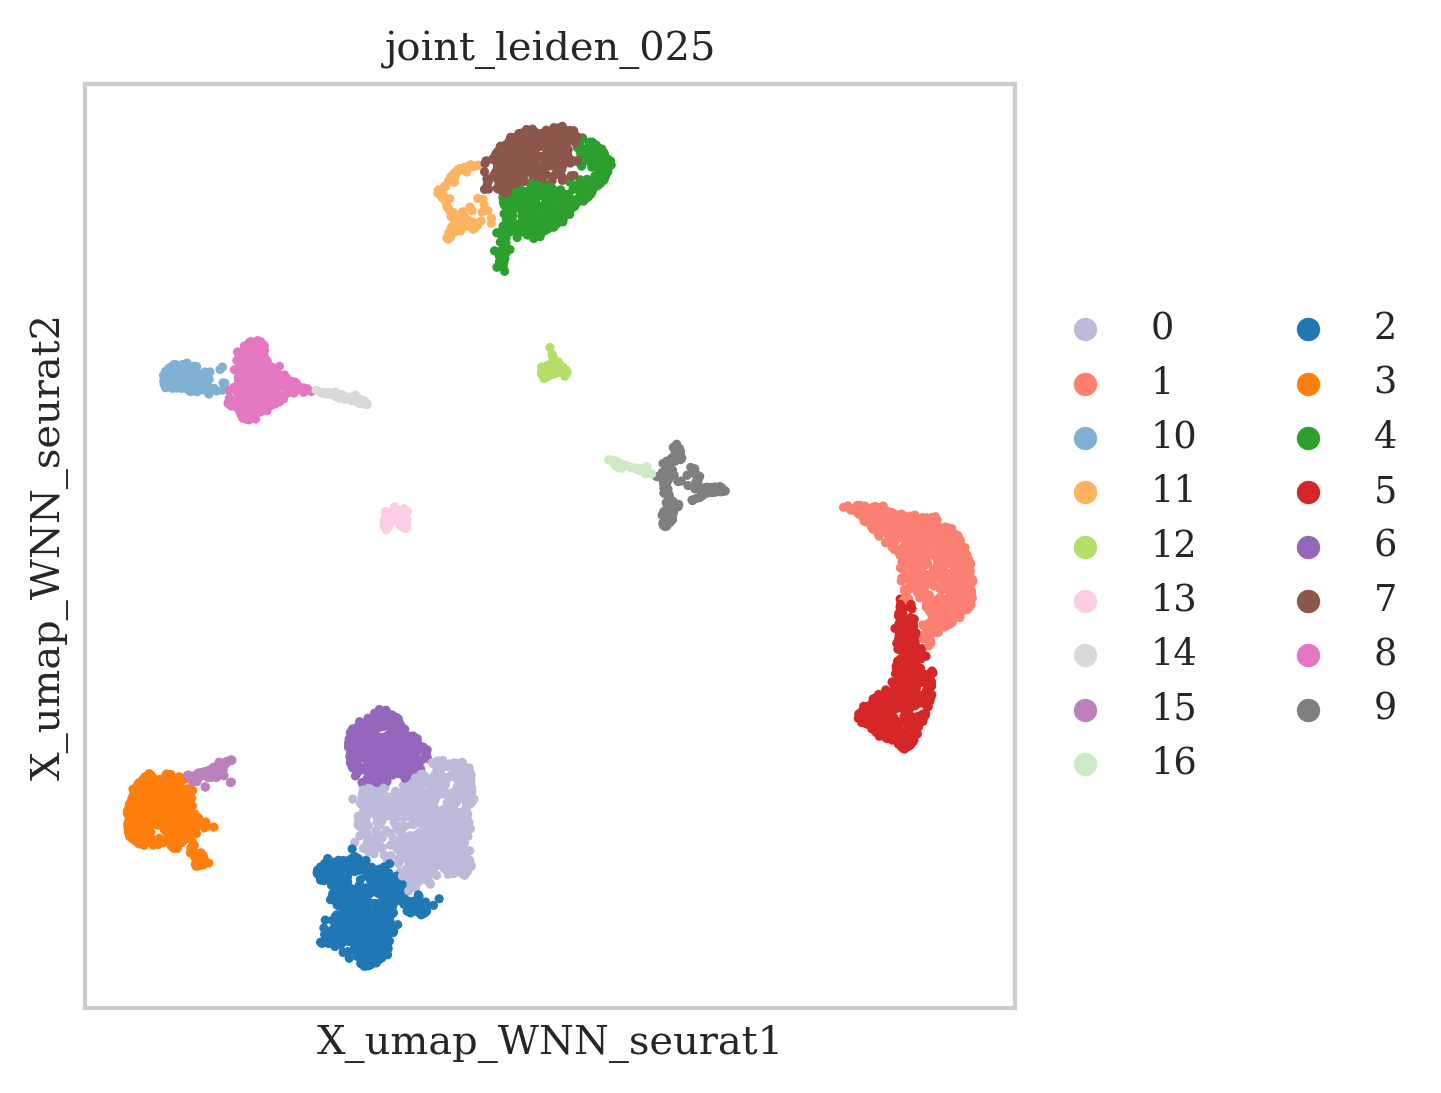

In [264]:

# joint WNN UMAP with leiden resolution of 0.25
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_WNN_seurat", color="joint_leiden_025", palette=merged_colors)

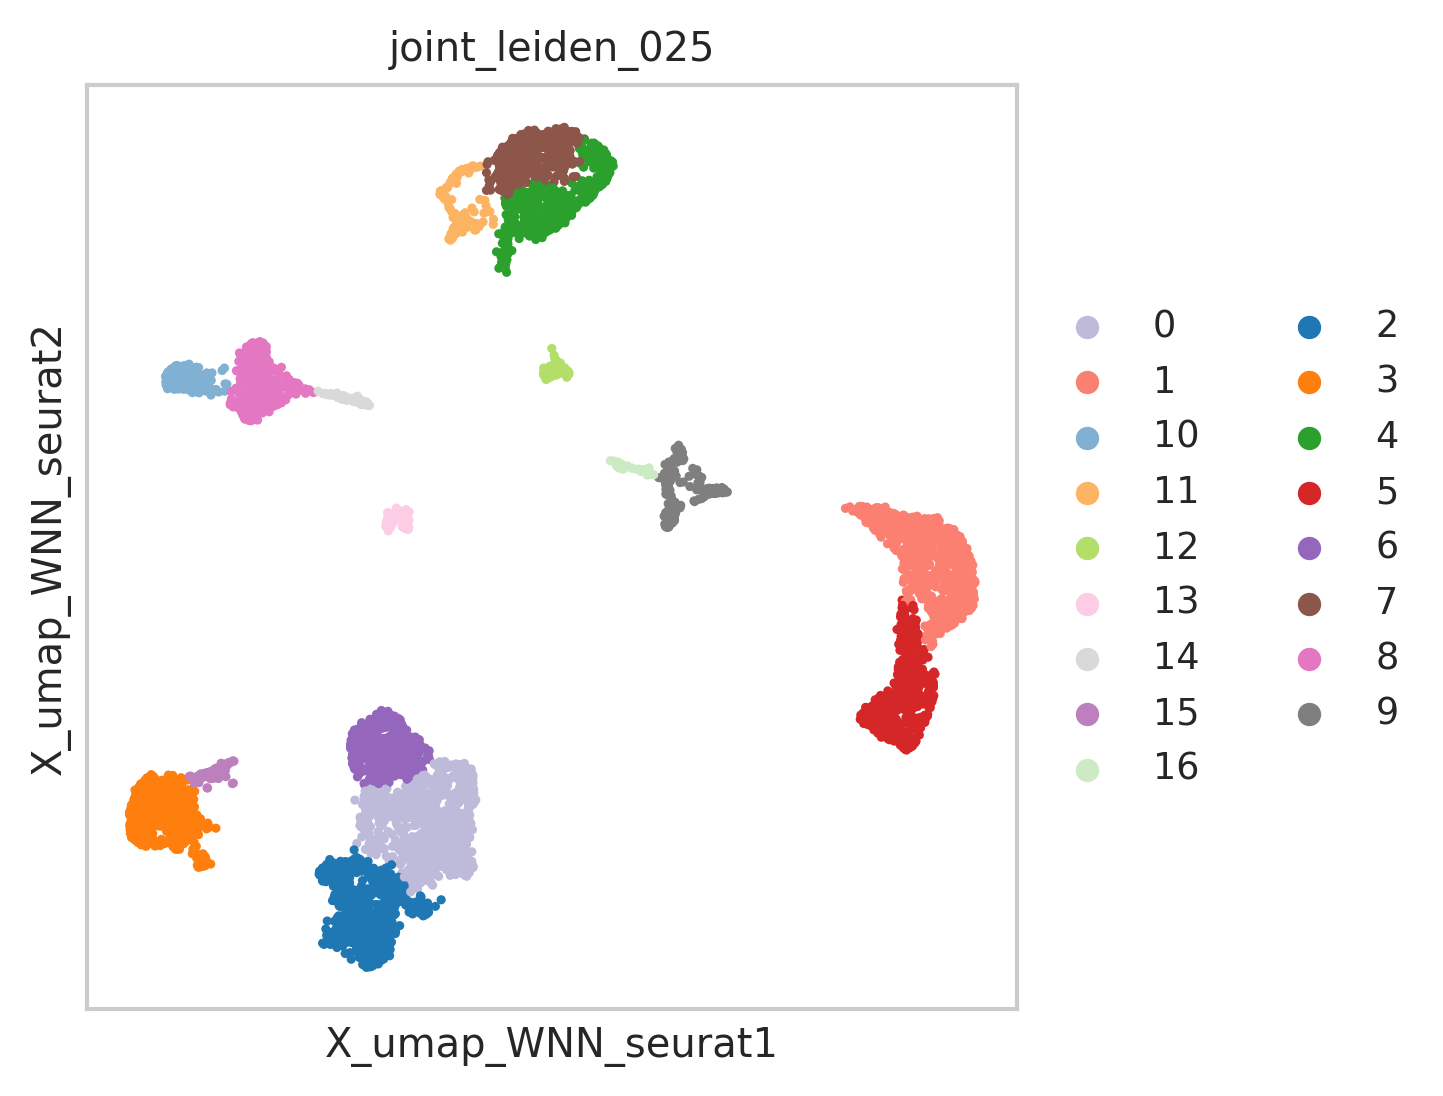

In [95]:

# joint WNN UMAP with leiden resolution of 0.25
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_WNN_seurat", color="joint_leiden_025", palette=merged_colors,
                    save="_leiden_joint_015.pdf")


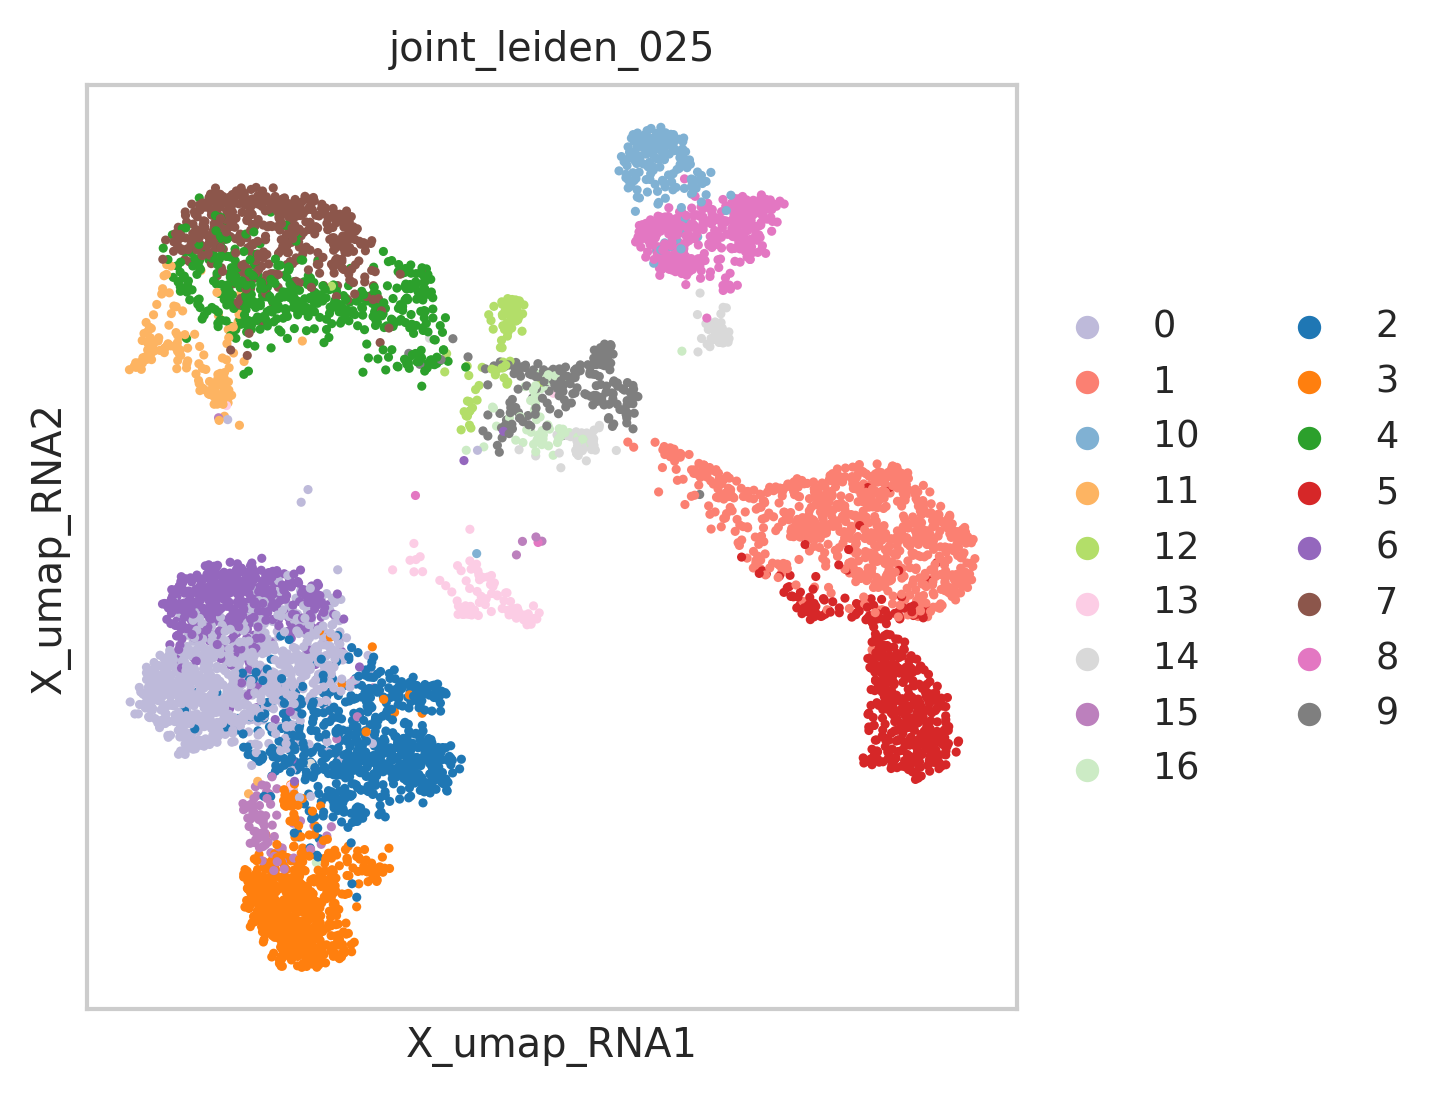

In [97]:
# RNA UMAP with joint leiden 0.25
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="joint_leiden_025",palette=merged_colors,
                    save="_leiden_joint_0.25.pdf")

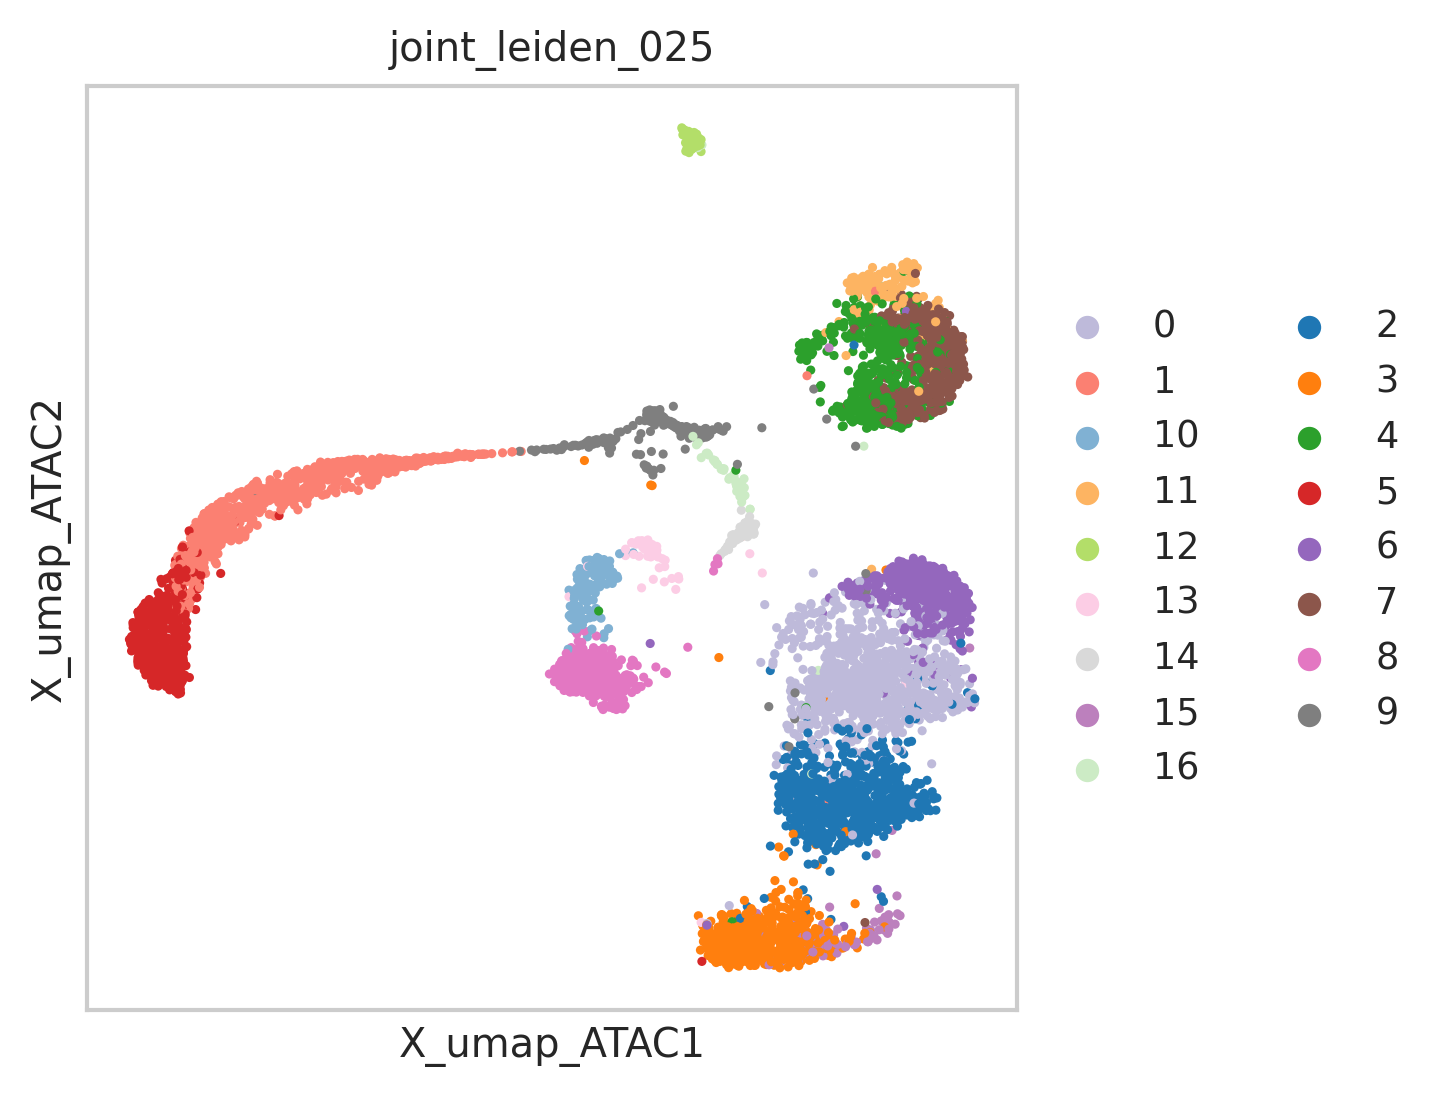

In [101]:
# ATAC UMAP with joint leiden 0.25
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="joint_leiden_025", palette=merged_colors,
                    save="_leiden_joint_0.25.pdf")

## Sankey diagram between GEX and ATAC leiden clustering results

### To-Do: It would be great if we can filter out the source-target pair whose connection is less than 10 cells (or 20 cells), to emphasize the major flows.

In [150]:
sys.path.append("/mnt/ibm_lg/yangjoon.kim/github_repos/pySankey/pysankey/")
from sankey import sankey as sk

help(sk)

Help on function sankey in module sankey:

sankey(left, right, leftWeight=None, rightWeight=None, colorDict=None, leftLabels=None, rightLabels=None, aspect=4, rightColor=False, fontsize=14, figureName=None, closePlot=False, threshold=None)
    Make Sankey Diagram showing flow from left-->right
    
    Inputs:
        left = NumPy array of object labels on the left of the diagram
        right = NumPy array of corresponding labels on the right of the diagram
            len(right) == len(left)
        leftWeight = NumPy array of weights for each strip starting from the
            left of the diagram, if not specified 1 is assigned
        rightWeight = NumPy array of weights for each strip starting from the
            right of the diagram, if not specified the corresponding leftWeight
            is assigned
        colorDict = Dictionary of colors to use for each label
            {'label':'color'}
        leftLabels = order of the left labels in the diagram
        rightLabels = or

In [145]:
sk

<function sankey.sankey(left, right, leftWeight=None, rightWeight=None, colorDict=None, leftLabels=None, rightLabels=None, aspect=4, rightColor=False, fontsize=14, figureName=None, closePlot=False, threshold=None)>

In [149]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.sankey import Sankey

# # set the threshold for the links
# threshold = 10

# # Filter the DataFrame to include only the columns you need
# df = pd.DataFrame({"GEX_leiden_015":adata.obs["GEX_leiden_015"],
#                    "ATAC_leiden_015":adata.obs["ATAC_leiden_015"]})

# # Create a new column "link_value" that contains the values for the links
# df["link_value"] = 1
# df
# # Group the DataFrame by the source and target columns and sum the link values
# df_grouped = df.groupby(["GEX_leiden_015", "ATAC_leiden_015"]).sum()
# df_grouped

# df_grouped_filtered = df_grouped[df_grouped["link_value"]>10]
# df_grouped_filtered

# # nodes = list(set(df_grouped.index.get_level_values(0)).union(set(df_grouped.index.get_level_values(1))))
# # links = [tuple(x) + (y,z) for x,y,z in zip(df_grouped.index, df_grouped["link_value"], df_grouped["link_color"])]



# # Define the Sankey diagram
# fig, ax = plt.subplots()
# sankey = Sankey(ax=ax, head_angle=180, shoulder=0.2, scale=0.01, unit='units')

# # Add the flows and labels to the Sankey diagram
# sankey.add(flows=df_grouped_filtered['link_value'], 
#            labels=df_grouped_filtered['GEX_leiden_015'],
#            orientations=df_grouped_filtered['ATAC_leiden_015'], 
#            pathlengths=np.zeros(len(df_grouped_filtered)))

# # Set the color of the flows
# colors = plt.cm.tab20(np.arange(len(df_grouped_filtered)))
# for i, patch in enumerate(sankey.patches):
#     patch.set_facecolor(colors[i])

# # Show the Sankey diagram
# sankey.finish()
# plt.show()

In [ ]:
# # set the threshold for the links
# threshold = 10

# # Filter the DataFrame to include only the columns you need
# df = pd.DataFrame({"GEX_leiden_015":adata.obs["GEX_leiden_015"],
#                    "ATAC_leiden_015":adata.obs["ATAC_leiden_015"]})

# # Create a new column "link_value" that contains the values for the links
# df["link_value"] = 1

# # Group the DataFrame by the source and target columns and sum the link values
# df_grouped = df.groupby(["GEX_leiden_015", "ATAC_leiden_015"]).sum()

# # Create a new column "link_color" that contains the colors for the links
# # df_grouped["link_color"] = df_grouped.index.get_level_values(0).map(colors)

# # Create a new column "link_alpha" that contains the alpha values for the links
# # df_grouped["link_alpha"] = 1.0

# # Filter out the links with values below the threshold
# # df_grouped.loc[df_grouped["link_value"] < threshold, "link_color"] = 
# # df_grouped.loc[df_grouped["link_value"] < threshold, "link_alpha"] = 0
# df_grouped.loc[df_grouped["link_value"]<threshold,"link_value"]=0
# #df_grouped[df_grouped["link_value"]>threshold]

# # Convert the Pandas DataFrame to two lists of nodes and links
# nodes = list(set(df_grouped.index.get_level_values(0)).union(set(df_grouped.index.get_level_values(1))))
# links = [tuple(x) + (y,z) for x,y,z in zip(df_grouped.index, df_grouped["link_value"], df_grouped["link_color"])]

# # Create the Sankey diagram
# fig = sankey(nodes, links, aspect=20, fontsize=12)

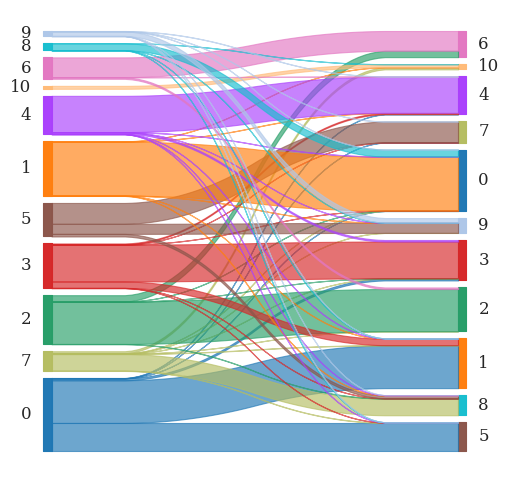

In [148]:
import pandas as pd

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

# define the colors as the Set1 as the RNA clusters
colors = {
    "0": "#1f77b4",
    "1": "#ff7f0e",
    "2": "#279e68",
    "3": "#d62728",
    "4": "#aa40fc",
    "5": '#8c564b',
    "6": '#e377c2',
    "7": '#b5bd61',
    "8": '#17becf',
    "9": '#aec7e8',
    "10": '#ffbb78',
    #"gray":'#808080'
}

fig = sankey(adata.obs["GEX_leiden_015"], adata.obs["ATAC_leiden_015"], 
             aspect=20, colorDict=colors, fontsize=12)
plt.savefig("GEX_ATAC_leiden_sankey.pdf", dpi=300)

In [164]:
adata.obs.GEX_leiden_015 = [label+"-GEX" for label in adata.obs.GEX_leiden_015 ]
adata.obs.head()

,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,leiden_final,atac_ann,cell_type,nCount_peaks,...,cell_type_RNA,cell_type_ATAC,GEX_leiden_015,ATAC_leiden_015,manual_annotation_fine,manual_annotation_coarse,joint_leiden_015,joint_leiden_05,joint_leiden_025,manual_annotation_B_fine
AAACAGCCAATTAAGG-1,1088,1.057872,1607.0,1088,0.475175,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,4624.0,...,CD4+ T naive,CD4+ T naive,0-GEX,5,CD4+T,unassigned,0,3,6,unassigned
AAACAGCCAGGCTGTT-1,2663,2.492565,7061.0,2663,1.831800,G2M,Lymph prog,Lymph prog,Lymph prog,11965.0,...,Lymph prog,Lymph prog,7-GEX,8,Lymph_prog,unassigned,6,9,16,unassigned
AAACATGCAAAGCGCA-1,1162,0.778643,1798.0,1162,0.587174,G2M,CD4+ T naive,CD4+ T activated,CD4+ T activated,6133.0,...,CD4+ T naive,CD4+ T activated,0-GEX,1,CD4+T,unassigned,0,7,0,unassigned
AAACATGCAATAACCT-1,1224,0.707635,2685.0,1224,0.572425,G2M,Erythroblast,"Proerythroblast, Erythroblast",Erythroblast,13197.0,...,Erythroblast,"Proerythroblast, Erythroblast",2-GEX,2,unassigned,unassigned,2,1,1,unassigned
AAACATGCAATAATGG-1,987,1.251739,1438.0,987,0.413489,S,CD8+ T,"CD4+ T activated, CD8+ T",CD8+ T,5136.0,...,CD8+ T,"CD4+ T activated, CD8+ T",3-GEX,3,CD8+T,unassigned,0,2,2,unassigned


In [165]:
adata.obs.ATAC_leiden_015 = [label+"-ATAC" for label in adata.obs.ATAC_leiden_015 ]
adata.obs.head()

,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,leiden_final,atac_ann,cell_type,nCount_peaks,...,cell_type_RNA,cell_type_ATAC,GEX_leiden_015,ATAC_leiden_015,manual_annotation_fine,manual_annotation_coarse,joint_leiden_015,joint_leiden_05,joint_leiden_025,manual_annotation_B_fine
AAACAGCCAATTAAGG-1,1088,1.057872,1607.0,1088,0.475175,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,4624.0,...,CD4+ T naive,CD4+ T naive,0-GEX,5-ATAC,CD4+T,unassigned,0,3,6,unassigned
AAACAGCCAGGCTGTT-1,2663,2.492565,7061.0,2663,1.831800,G2M,Lymph prog,Lymph prog,Lymph prog,11965.0,...,Lymph prog,Lymph prog,7-GEX,8-ATAC,Lymph_prog,unassigned,6,9,16,unassigned
AAACATGCAAAGCGCA-1,1162,0.778643,1798.0,1162,0.587174,G2M,CD4+ T naive,CD4+ T activated,CD4+ T activated,6133.0,...,CD4+ T naive,CD4+ T activated,0-GEX,1-ATAC,CD4+T,unassigned,0,7,0,unassigned
AAACATGCAATAACCT-1,1224,0.707635,2685.0,1224,0.572425,G2M,Erythroblast,"Proerythroblast, Erythroblast",Erythroblast,13197.0,...,Erythroblast,"Proerythroblast, Erythroblast",2-GEX,2-ATAC,unassigned,unassigned,2,1,1,unassigned
AAACATGCAATAATGG-1,987,1.251739,1438.0,987,0.413489,S,CD8+ T,"CD4+ T activated, CD8+ T",CD8+ T,5136.0,...,CD8+ T,"CD4+ T activated, CD8+ T",3-GEX,3-ATAC,CD8+T,unassigned,0,2,2,unassigned


In [166]:
left = adata.obs["GEX_leiden_015"]
right = adata.obs["ATAC_leiden_015"]
leftWeight = []
rightWeight = []
# Check weights
if len(leftWeight) == 0:
    leftWeight = np.ones(len(left))

if len(rightWeight) == 0:
    rightWeight = leftWeight


# Create Dataframe
if isinstance(left, pd.Series):
    left = left.reset_index(drop=True)
if isinstance(right, pd.Series):
    right = right.reset_index(drop=True)
dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                          'rightWeight': rightWeight}, index=range(len(left)))
dataFrame

,left,right,leftWeight,rightWeight
0,0-GEX,5-ATAC,1.0,1.0
1,7-GEX,8-ATAC,1.0,1.0
2,0-GEX,1-ATAC,1.0,1.0
3,2-GEX,2-ATAC,1.0,1.0
4,3-GEX,3-ATAC,1.0,1.0
...,...,...,...,...
6219,1-GEX,0-ATAC,1.0,1.0
6220,0-GEX,1-ATAC,1.0,1.0
6221,0-GEX,1-ATAC,1.0,1.0
6222,0-GEX,5-ATAC,1.0,1.0


array(['0-GEX', '7-GEX', '2-GEX', '3-GEX', '5-GEX', '1-GEX', '4-GEX',
       '10-GEX', '6-GEX', '8-GEX', '9-GEX', '5-ATAC', '8-ATAC', '1-ATAC',
       '2-ATAC', '3-ATAC', '9-ATAC', '0-ATAC', '7-ATAC', '4-ATAC',
       '10-ATAC', '6-ATAC'], dtype=object)

In [171]:
leftLabels = pd.Series(dataFrame.left.unique()).unique()
leftLabels
rightLabels = pd.Series(dataFrame.right.unique()).unique()
rightLabels

array(['5-ATAC', '8-ATAC', '1-ATAC', '2-ATAC', '3-ATAC', '9-ATAC',
       '0-ATAC', '7-ATAC', '4-ATAC', '10-ATAC', '6-ATAC'], dtype=object)

In [217]:

threshold =50

left = adata.obs["GEX_leiden_015"]
right = adata.obs["ATAC_leiden_015"]
leftWeight = []
rightWeight = []

# Check weights
if len(leftWeight) == 0:
    leftWeight = np.ones(len(left))

if len(rightWeight) == 0:
    rightWeight = leftWeight


# Create Dataframe
if isinstance(left, pd.Series):
    left = left.reset_index(drop=True)
if isinstance(right, pd.Series):
    right = right.reset_index(drop=True)
dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                          'rightWeight': rightWeight}, index=range(len(left)))
dataFrame

allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()
allLabels

leftLabels = pd.Series(dataFrame.left.unique()).unique()
leftLabels
rightLabels = pd.Series(dataFrame.right.unique()).unique()
rightLabels

ns_l = {}
ns_r = {}
for leftLabel in leftLabels:
    leftDict = {}
    rightDict = {}
    for rightLabel in rightLabels:
        # compute the link values for left and right incorporating the left/right weights
        left_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
        right_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        # only add the link_values that are larger than the threshold
        if left_link_value > threshold and right_link_value > threshold:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        else:
            pass
            #leftDict[rightLabel] = 0
            #rightDict[rightLabel] = 0
    ns_l[leftLabel] = leftDict
    ns_r[leftLabel] = rightDict  

ns_l

{'0-GEX': {'5-ATAC': 499.0, '1-ATAC': 759.0},
 '7-GEX': {'8-ATAC': 296.0},
 '2-GEX': {'2-ATAC': 752.0, '6-ATAC': 113.0},
 '3-GEX': {'1-ATAC': 114.0, '3-ATAC': 655.0},
 '5-GEX': {'9-ATAC': 179.0, '7-ATAC': 371.0},
 '1-GEX': {'0-ATAC': 959.0},
 '4-GEX': {'4-ATAC': 645.0},
 '10-GEX': {'10-ATAC': 53.0},
 '6-GEX': {'6-ATAC': 352.0},
 '8-GEX': {'0-ATAC': 124.0},
 '9-GEX': {'9-ATAC': 82.0}}

In [229]:
leftLabels

array(['0-GEX', '7-GEX', '2-GEX', '3-GEX', '5-GEX', '1-GEX', '4-GEX',
       '10-GEX', '6-GEX', '8-GEX', '9-GEX'], dtype=object)

In [186]:
ns_l.keys()
ns_r.keys()

dict_keys(['0-GEX', '7-GEX', '2-GEX', '3-GEX', '5-GEX', '1-GEX', '4-GEX', '10-GEX', '6-GEX', '8-GEX', '9-GEX'])

In [218]:
leftWidths = {}
for i, leftLabel in enumerate(leftLabels):
    myD = {}
    myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['left']
    else:
        myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
        myD['top'] = myD['bottom'] + myD['left']
        topEdge = myD['top']
    leftWidths[leftLabel] = myD
leftWidths

# Determine positions of right label patches and total widths
rightWidths = {}
for i, rightLabel in enumerate(rightLabels):
    myD = {}
    myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['right']
    else:
        myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
        myD['top'] = myD['bottom'] + myD['right']
        topEdge = myD['top']
    rightWidths[rightLabel] = myD
    
rightWidths

{'5-ATAC': {'right': 511.0, 'bottom': 0, 'top': 511.0},
 '8-ATAC': {'right': 358.0, 'bottom': 635.48, 'top': 993.48},
 '1-ATAC': {'right': 885.0, 'bottom': 1117.96, 'top': 2002.96},
 '2-ATAC': {'right': 781.0, 'bottom': 2127.44, 'top': 2908.44},
 '3-ATAC': {'right': 719.0, 'bottom': 3032.92, 'top': 3751.92},
 '9-ATAC': {'right': 266.0, 'bottom': 3876.4, 'top': 4142.4},
 '0-ATAC': {'right': 1094.0,
  'bottom': 4266.879999999999,
  'top': 5360.879999999999},
 '7-ATAC': {'right': 375.0,
  'bottom': 5485.359999999999,
  'top': 5860.359999999999},
 '4-ATAC': {'right': 677.0,
  'bottom': 5984.839999999998,
  'top': 6661.839999999998},
 '10-ATAC': {'right': 93.0,
  'bottom': 6786.319999999998,
  'top': 6879.319999999998},
 '6-ATAC': {'right': 465.0,
  'bottom': 7003.799999999997,
  'top': 7468.799999999997}}

In [239]:
colors = {
    # GEX color palette (Set1)
    "0-GEX": "#1f77b4",
    "1-GEX": "#ff7f0e",
    "2-GEX": "#279e68",
    "3-GEX": "#d62728",
    "4-GEX": "#aa40fc",
    "5-GEX": '#8c564b',
    "6-GEX": '#e377c2',
    "7-GEX": '#b5bd61',
    "8-GEX": '#17becf',
    "9-GEX": '#aec7e8',
    "10-GEX": '#ffbb78',
    # ATAC (Set2)
    "0-ATAC": "#1b9e77",
    "1-ATAC": "#d95f02",
    "2-ATAC": "#7570b3",
    "3-ATAC": "#e7298a",
    "4-ATAC": "#66a61e",
    "5-ATAC": '#e6ab02',
    "6-ATAC": '#a6761d',
    "7-ATAC": '#666666',
    "8-ATAC": '#a95c68',
    "9-ATAC": '#587b7f',
    "10-ATAC": '#8b6d9c',
    
     "0":'#bebada',
     "1":'#fb8072',
     "2":'#80b1d3',
     "3":'#fdb462',
     "4":'#b3de69',
     "5":'#fccde5',
     "6":'#d9d9d9',
     "7":'#bc80bd',
     "8":'#ccebc5',
     "9":'#1f77b4',
     "10": '#ff7f0e',
     "11":'#2ca02c',
     "12":'#d62728',
     "13":'#9467bd',
     "14":'#8c564b',
     "15":'#e377c2',
     "16":'#7f7f7f'
    
}
colorDict = colors

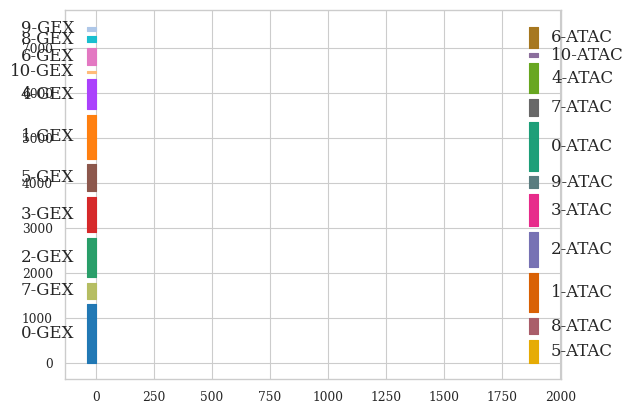

In [204]:
# Total vertical extent of diagram
aspect =4
fontsize=12
xMax = topEdge / aspect

# Draw vertical bars on left and right of each  label's section & print label
for leftLabel in leftLabels:
    plt.fill_between(
        [-0.02 * xMax, 0],
        2 * [leftWidths[leftLabel]['bottom']],
        2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
        color=colorDict[leftLabel],
        alpha=0.99
    )
    plt.text(
        -0.05 * xMax,
        leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
        leftLabel,
        {'ha': 'right', 'va': 'center'},
        fontsize=fontsize
    )
for rightLabel in rightLabels:
    plt.fill_between(
        [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
        2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
        color=colorDict[rightLabel],
        alpha=0.99
    )
    plt.text(
        1.05 * xMax,
        rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
        rightLabel,
        {'ha': 'left', 'va': 'center'},
        fontsize=fontsize
    )

In [201]:
leftWidths
rightWidths

{'5-ATAC': {'right': 511.0, 'bottom': 2994.0, 'top': 511.0},
 '8-ATAC': {'right': 358.0, 'bottom': 2687.48, 'top': 993.48},
 '1-ATAC': {'right': 885.0, 'bottom': 6355.96, 'top': 2002.96},
 '2-ATAC': {'right': 781.0, 'bottom': 6807.4400000000005, 'top': 2908.44},
 '3-ATAC': {'right': 719.0, 'bottom': 7328.92, 'top': 3751.92},
 '9-ATAC': {'right': 266.0, 'bottom': 5442.4, 'top': 4142.4},
 '0-ATAC': {'right': 1094.0, 'bottom': 10764.88, 'top': 5360.879999999999},
 '7-ATAC': {'right': 375.0,
  'bottom': 7711.359999999999,
  'top': 5860.359999999999},
 '4-ATAC': {'right': 677.0,
  'bottom': 9968.839999999998,
  'top': 6661.839999999998},
 '10-ATAC': {'right': 93.0,
  'bottom': 7320.319999999998,
  'top': 6879.319999999998},
 '6-ATAC': {'right': 465.0,
  'bottom': 9793.799999999997,
  'top': 7468.799999999997}}

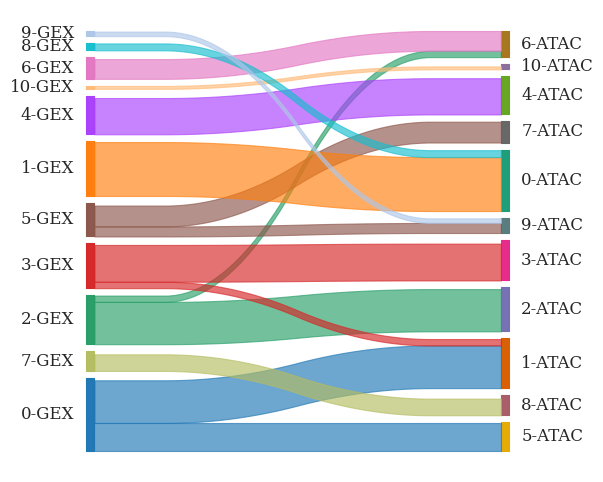

In [219]:
threshold =50

left = adata.obs["GEX_leiden_015"]
right = adata.obs["ATAC_leiden_015"]
leftWeight = []
rightWeight = []

# Check weights
if len(leftWeight) == 0:
    leftWeight = np.ones(len(left))

if len(rightWeight) == 0:
    rightWeight = leftWeight


# Create Dataframe
if isinstance(left, pd.Series):
    left = left.reset_index(drop=True)
if isinstance(right, pd.Series):
    right = right.reset_index(drop=True)
dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                          'rightWeight': rightWeight}, index=range(len(left)))
dataFrame

allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()
allLabels

leftLabels = pd.Series(dataFrame.left.unique()).unique()
leftLabels
rightLabels = pd.Series(dataFrame.right.unique()).unique()
rightLabels

ns_l = {}
ns_r = {}
for leftLabel in leftLabels:
    leftDict = {}
    rightDict = {}
    for rightLabel in rightLabels:
        # compute the link values for left and right incorporating the left/right weights
        left_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
        right_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        # only add the link_values that are larger than the threshold
        if left_link_value > threshold and right_link_value > threshold:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        else:
            pass
            #leftDict[rightLabel] = 0
            #rightDict[rightLabel] = 0
    ns_l[leftLabel] = leftDict
    ns_r[leftLabel] = rightDict  

ns_l

leftWidths = {}
for i, leftLabel in enumerate(leftLabels):
    myD = {}
    myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['left']
    else:
        myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
        myD['top'] = myD['bottom'] + myD['left']
        topEdge = myD['top']
    leftWidths[leftLabel] = myD
leftWidths

# Determine positions of right label patches and total widths
rightWidths = {}
for i, rightLabel in enumerate(rightLabels):
    myD = {}
    myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['right']
    else:
        myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
        myD['top'] = myD['bottom'] + myD['right']
        topEdge = myD['top']
    rightWidths[rightLabel] = myD
    
rightWidths

# Total vertical extent of diagram
aspect =4
fontsize=12
xMax = topEdge / aspect

# Draw vertical bars on left and right of each  label's section & print label
for leftLabel in leftLabels:
    plt.fill_between(
        [-0.02 * xMax, 0],
        2 * [leftWidths[leftLabel]['bottom']],
        2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
        color=colorDict[leftLabel],
        alpha=0.99
    )
    plt.text(
        -0.05 * xMax,
        leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
        leftLabel,
        {'ha': 'right', 'va': 'center'},
        fontsize=fontsize
    )
for rightLabel in rightLabels:
    plt.fill_between(
        [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
        2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
        color=colorDict[rightLabel],
        alpha=0.99
    )
    plt.text(
        1.05 * xMax,
        rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
        rightLabel,
        {'ha': 'left', 'va': 'center'},
        fontsize=fontsize
    )

rightColor=[]
figureName=[]
closePlot = []
# Plot strips
for leftLabel in leftLabels:
    for rightLabel in rightLabels:
        labelColor = leftLabel
        if rightColor:
            labelColor = rightLabel
        if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > threshold:
            # Create array of y values for each strip, half at left value,
            # half at right, convolve
            ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

            # Update bottom edges at each label so next strip starts at the right place
            leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
            rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
            plt.fill_between(
                np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                color=colorDict[labelColor]
            )
plt.gca().axis('off')
plt.gcf().set_size_inches(6, 6)
if figureName != None:
    plt.savefig("{}.png".format(figureName), bbox_inches='tight', dpi=150)
if closePlot:
    plt.close()
plt.savefig("GEX_ADT_leiden_sankey_filtered_50.pdf", dpi=300)

In [238]:
adata.uns["joint_leiden_025_colors"]

['#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f']

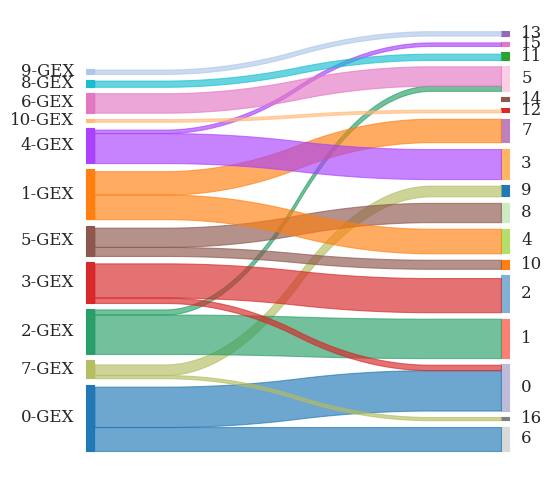

In [240]:
threshold =50

left = adata.obs["GEX_leiden_015"]
right = adata.obs["joint_leiden_025"]
leftWeight = []
rightWeight = []

# Check weights
if len(leftWeight) == 0:
    leftWeight = np.ones(len(left))

if len(rightWeight) == 0:
    rightWeight = leftWeight


# Create Dataframe
if isinstance(left, pd.Series):
    left = left.reset_index(drop=True)
if isinstance(right, pd.Series):
    right = right.reset_index(drop=True)
dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                          'rightWeight': rightWeight}, index=range(len(left)))
dataFrame

allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()
allLabels

leftLabels = pd.Series(dataFrame.left.unique()).unique()
leftLabels
rightLabels = pd.Series(dataFrame.right.unique()).unique()
rightLabels

ns_l = {}
ns_r = {}
for leftLabel in leftLabels:
    leftDict = {}
    rightDict = {}
    for rightLabel in rightLabels:
        # compute the link values for left and right incorporating the left/right weights
        left_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
        right_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        # only add the link_values that are larger than the threshold
        if left_link_value > threshold and right_link_value > threshold:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        else:
            pass
            #leftDict[rightLabel] = 0
            #rightDict[rightLabel] = 0
    ns_l[leftLabel] = leftDict
    ns_r[leftLabel] = rightDict  

ns_l

leftWidths = {}
for i, leftLabel in enumerate(leftLabels):
    myD = {}
    myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['left']
    else:
        myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
        myD['top'] = myD['bottom'] + myD['left']
        topEdge = myD['top']
    leftWidths[leftLabel] = myD
leftWidths

# Determine positions of right label patches and total widths
rightWidths = {}
for i, rightLabel in enumerate(rightLabels):
    myD = {}
    myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['right']
    else:
        myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
        myD['top'] = myD['bottom'] + myD['right']
        topEdge = myD['top']
    rightWidths[rightLabel] = myD
    
rightWidths

# Total vertical extent of diagram
aspect =4
fontsize=12
xMax = topEdge / aspect

# Draw vertical bars on left and right of each  label's section & print label
for leftLabel in leftLabels:
    plt.fill_between(
        [-0.02 * xMax, 0],
        2 * [leftWidths[leftLabel]['bottom']],
        2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
        color=colorDict[leftLabel],
        alpha=0.99
    )
    plt.text(
        -0.05 * xMax,
        leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
        leftLabel,
        {'ha': 'right', 'va': 'center'},
        fontsize=fontsize
    )
for rightLabel in rightLabels:
    plt.fill_between(
        [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
        2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
        color=colorDict[rightLabel],
        alpha=0.99
    )
    plt.text(
        1.05 * xMax,
        rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
        rightLabel,
        {'ha': 'left', 'va': 'center'},
        fontsize=fontsize
    )

rightColor=[]
figureName=[]
closePlot = []
# Plot strips
for leftLabel in leftLabels:
    for rightLabel in rightLabels:
        labelColor = leftLabel
        if rightColor:
            labelColor = rightLabel
        if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > threshold:
            # Create array of y values for each strip, half at left value,
            # half at right, convolve
            ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

            # Update bottom edges at each label so next strip starts at the right place
            leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
            rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
            plt.fill_between(
                np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                color=colorDict[labelColor]
            )
plt.gca().axis('off')
plt.gcf().set_size_inches(6, 6)
if figureName != None:
    plt.savefig("{}.png".format(figureName), bbox_inches='tight', dpi=150)
if closePlot:
    plt.close()
plt.savefig("GEX_joint_leiden_sankey_filtered_50.pdf", dpi=300)

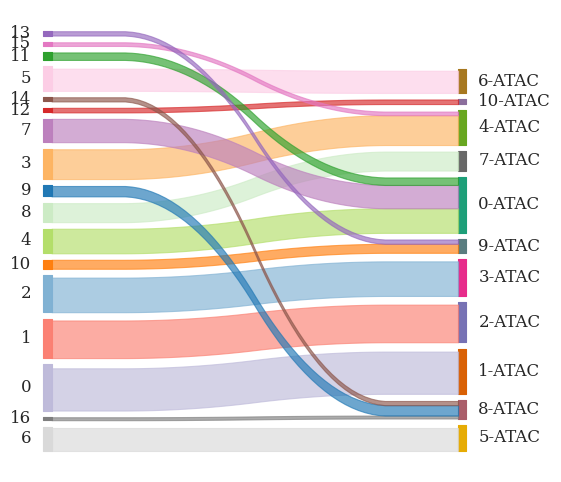

In [241]:
threshold =50

left = adata.obs["joint_leiden_025"]
right = adata.obs["ATAC_leiden_015"]
leftWeight = []
rightWeight = []

# Check weights
if len(leftWeight) == 0:
    leftWeight = np.ones(len(left))

if len(rightWeight) == 0:
    rightWeight = leftWeight


# Create Dataframe
if isinstance(left, pd.Series):
    left = left.reset_index(drop=True)
if isinstance(right, pd.Series):
    right = right.reset_index(drop=True)
dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                          'rightWeight': rightWeight}, index=range(len(left)))
dataFrame

allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()
allLabels

leftLabels = pd.Series(dataFrame.left.unique()).unique()
leftLabels
rightLabels = pd.Series(dataFrame.right.unique()).unique()
rightLabels

ns_l = {}
ns_r = {}
for leftLabel in leftLabels:
    leftDict = {}
    rightDict = {}
    for rightLabel in rightLabels:
        # compute the link values for left and right incorporating the left/right weights
        left_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
        right_link_value = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        # only add the link_values that are larger than the threshold
        if left_link_value > threshold and right_link_value > threshold:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        else:
            pass
            #leftDict[rightLabel] = 0
            #rightDict[rightLabel] = 0
    ns_l[leftLabel] = leftDict
    ns_r[leftLabel] = rightDict  

ns_l

leftWidths = {}
for i, leftLabel in enumerate(leftLabels):
    myD = {}
    myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['left']
    else:
        myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
        myD['top'] = myD['bottom'] + myD['left']
        topEdge = myD['top']
    leftWidths[leftLabel] = myD
leftWidths

# Determine positions of right label patches and total widths
rightWidths = {}
for i, rightLabel in enumerate(rightLabels):
    myD = {}
    myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
    if i == 0:
        myD['bottom'] = 0
        myD['top'] = myD['right']
    else:
        myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
        myD['top'] = myD['bottom'] + myD['right']
        topEdge = myD['top']
    rightWidths[rightLabel] = myD
    
rightWidths

# Total vertical extent of diagram
aspect =4
fontsize=12
xMax = topEdge / aspect

# Draw vertical bars on left and right of each  label's section & print label
for leftLabel in leftLabels:
    plt.fill_between(
        [-0.02 * xMax, 0],
        2 * [leftWidths[leftLabel]['bottom']],
        2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
        color=colorDict[leftLabel],
        alpha=0.99
    )
    plt.text(
        -0.05 * xMax,
        leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
        leftLabel,
        {'ha': 'right', 'va': 'center'},
        fontsize=fontsize
    )
for rightLabel in rightLabels:
    plt.fill_between(
        [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
        2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
        color=colorDict[rightLabel],
        alpha=0.99
    )
    plt.text(
        1.05 * xMax,
        rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
        rightLabel,
        {'ha': 'left', 'va': 'center'},
        fontsize=fontsize
    )

rightColor=[]
figureName=[]
closePlot = []
# Plot strips
for leftLabel in leftLabels:
    for rightLabel in rightLabels:
        labelColor = leftLabel
        if rightColor:
            labelColor = rightLabel
        if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > threshold:
            # Create array of y values for each strip, half at left value,
            # half at right, convolve
            ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
            ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
            ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

            # Update bottom edges at each label so next strip starts at the right place
            leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
            rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
            plt.fill_between(
                np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                color=colorDict[labelColor]
            )
plt.gca().axis('off')
plt.gcf().set_size_inches(6, 6)
if figureName != None:
    plt.savefig("{}.png".format(figureName), bbox_inches='tight', dpi=150)
if closePlot:
    plt.close()
plt.savefig("joint_ATAC_leiden_sankey_filtered_50.pdf", dpi=300)

In [ ]:
### Debugging done.

In [234]:
len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)])

0

In [233]:
rightLabel

'6-ATAC'

KeyError: '0-ATAC'

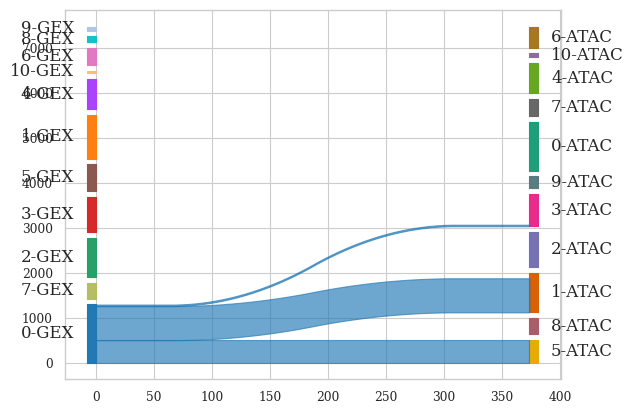

In [230]:
sys.path.append("/mnt/ibm_lg/yangjoon.kim/github_repos/pySankey/pysankey/")
from sankey import sankey as sk

# define the colors as the Set1 as the RNA clusters
colors = {
    # GEX color palette (Set1)
    "0-GEX": "#1f77b4",
    "1-GEX": "#ff7f0e",
    "2-GEX": "#279e68",
    "3-GEX": "#d62728",
    "4-GEX": "#aa40fc",
    "5-GEX": '#8c564b',
    "6-GEX": '#e377c2',
    "7-GEX": '#b5bd61',
    "8-GEX": '#17becf',
    "9-GEX": '#aec7e8',
    "10-GEX": '#ffbb78',
    # ATAC (Set2)
    "0-ATAC": "#1b9e77",
    "1-ATAC": "#d95f02",
    "2-ATAC": "#7570b3",
    "3-ATAC": "#e7298a",
    "4-ATAC": "#66a61e",
    "5-ATAC": '#e6ab02',
    "6-ATAC": '#a6761d',
    "7-ATAC": '#666666',
    "8-ATAC": '#a95c68',
    "9-ATAC": '#587b7f',
    "10-ATAC": '#8b6d9c',
    
}
# GEX_colors = ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
#        '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78']
# ATAC_colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02',
#        '#a6761d', '#666666', '#a95c68', '#587b7f', '#8b6d9c']

fig = sk(adata.obs["GEX_leiden_015"], adata.obs["ATAC_leiden_015"], 
             aspect=20, colorDict=colors, fontsize=12, threshold=20)
plt.savefig("GEX_ATAC_leiden_sankey_min20.pdf", dpi=300)

In [225]:
leftWidths

{'0-GEX': {'left': 1299.0, 'bottom': 1258.0, 'top': 1299.0},
 '7-GEX': {'left': 351.0, 'bottom': 1719.48, 'top': 1774.48},
 '2-GEX': {'left': 872.0, 'bottom': 2763.96, 'top': 2770.96},
 '3-GEX': {'left': 795.0, 'bottom': 3664.44, 'top': 3690.44},
 '5-GEX': {'left': 596.0, 'bottom': 4364.92, 'top': 4410.92},
 '1-GEX': {'left': 972.0, 'bottom': 5494.4, 'top': 5507.4},
 '4-GEX': {'left': 684.0,
  'bottom': 6276.879999999999,
  'top': 6315.879999999999},
 '10-GEX': {'left': 53.0,
  'bottom': 6493.359999999999,
  'top': 6493.359999999999},
 '6-GEX': {'left': 382.0,
  'bottom': 6969.839999999998,
  'top': 6999.839999999998},
 '8-GEX': {'left': 128.0,
  'bottom': 7248.319999999998,
  'top': 7252.319999999998},
 '9-GEX': {'left': 92.0,
  'bottom': 7458.799999999997,
  'top': 7468.799999999997}}

In [212]:
adata.obs["GEX_leiden_015"].unique()
adata.obs["ATAC_leiden_015"].unique()

array(['5-ATAC', '8-ATAC', '1-ATAC', '2-ATAC', '3-ATAC', '9-ATAC',
       '0-ATAC', '7-ATAC', '4-ATAC', '10-ATAC', '6-ATAC'], dtype=object)

In [48]:
# copy over the annotations from anndata objects after exCellxgene annotation
# for leiden clustering on joint embedding (neighborhoods from WNN)
adata.obs["joint_leiden_025"] = adata_leiden.obs["joint_leiden_025"]
# for manual annotation for B cell population
adata.obs["manual_annotation_coarse"] = adata_cxg.obs["manual_annotation_coarse"]
adata.obs["manual_annotation_fine"] = adata_cxg.obs["manual_annotation_fine"]
adata.obs["manual_annotation_B_fine"] = adata_cxg.obs["manual_annotation_B_fine"]

In [105]:
adata.uns

OverloadedDict, wrapping:
	{'ATAC_leiden_015_colors': array(['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02',
       '#a6761d', '#666666', '#a95c68', '#587b7f', '#8b6d9c'],
      dtype=object), 'GEX_leiden_015_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'cell_type_colors': array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7'], dtype=object), 'joint_leiden_015_colors': array(['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860',
       '#da8bc3', '#8c8c8c'], dtype=object), 'joint_leiden_05_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df

In [ ]:
# reformat the leiden clustering IDs for each modality for easier generation of sankey diagram.



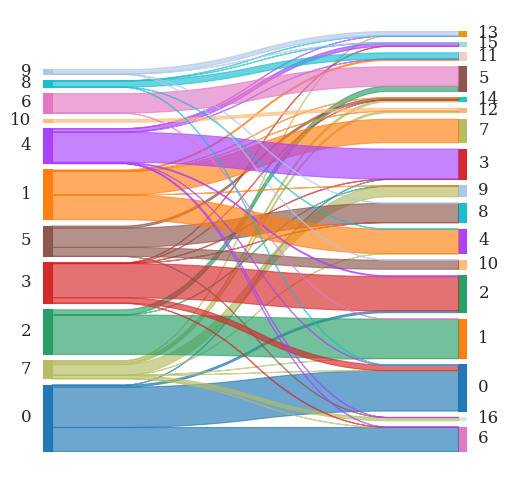

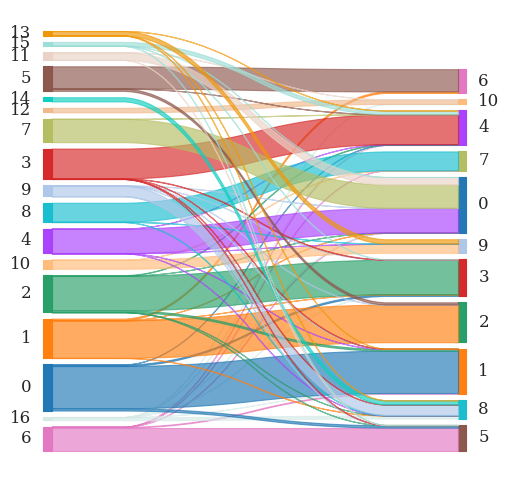

In [108]:
import pandas as pd

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

# define the colors as the Set1 as the RNA clusters
colors = {
    "0": "#1f77b4",
    "1": "#ff7f0e",
    "2": "#279e68",
    "3": "#d62728",
    "4": "#aa40fc",
    "5": '#8c564b',
    "6": '#e377c2',
    "7": '#b5bd61',
    "8": '#17becf',
    "9": '#aec7e8',
    "10": '#ffbb78',
    "11": '#ead3c6',
    "12": '#f0b98d',
    "13": '#ef9708',
    "14": '#0fcfc0',
    "15": '#9cded6',
    "16":'#d5eae7'
}
fig1 = sankey(adata.obs["GEX_leiden_015"], adata.obs["joint_leiden_025"],
             aspect=20, colorDict=colors, fontsize=12)
fig2 = sankey(adata.obs["joint_leiden_025"], adata.obs["ATAC_leiden_015"],
             aspect=20, colorDict=colors, fontsize=12)
plt.show()
# plt.savefig("joint_GEX_ATAC_leiden_sankey.pdf", dpi=300)

In [267]:
colors

{'0-GEX': '#1f77b4',
 '1-GEX': '#ff7f0e',
 '2-GEX': '#279e68',
 '3-GEX': '#d62728',
 '4-GEX': '#aa40fc',
 '5-GEX': '#8c564b',
 '6-GEX': '#e377c2',
 '7-GEX': '#b5bd61',
 '8-GEX': '#17becf',
 '9-GEX': '#aec7e8',
 '10-GEX': '#ffbb78',
 '0-ATAC': '#1b9e77',
 '1-ATAC': '#d95f02',
 '2-ATAC': '#7570b3',
 '3-ATAC': '#e7298a',
 '4-ATAC': '#66a61e',
 '5-ATAC': '#e6ab02',
 '6-ATAC': '#a6761d',
 '7-ATAC': '#666666',
 '8-ATAC': '#a95c68',
 '9-ATAC': '#587b7f',
 '10-ATAC': '#8b6d9c',
 '0': '#bebada',
 '1': '#fb8072',
 '2': '#80b1d3',
 '3': '#fdb462',
 '4': '#b3de69',
 '5': '#fccde5',
 '6': '#d9d9d9',
 '7': '#bc80bd',
 '8': '#ccebc5',
 '9': '#1f77b4',
 '10': '#ff7f0e',
 '11': '#2ca02c',
 '12': '#d62728',
 '13': '#9467bd',
 '14': '#8c564b',
 '15': '#e377c2',
 '16': '#7f7f7f'}

In [56]:
df = pd.DataFrame({"GEX_leiden_015":adata.obs["GEX_leiden_015"],
                   "ATAC_leiden_015":adata.obs["ATAC_leiden_015"]})
df

,GEX_leiden_015,ATAC_leiden_015
AAACAGCCAATTAAGG-1,0,5
AAACAGCCAGGCTGTT-1,7,8
AAACATGCAAAGCGCA-1,0,1
AAACATGCAATAACCT-1,2,2
...,...,...
TTTGTGTTCATTTGCT-1,0,1
TTTGTGTTCGCCTAAG-1,0,1
TTTGTTGGTACGGTAC-1,0,5
TTTGTTGGTTCGGTAA-1,4,4


# Section 2.

# Annotation/Exploration using exCellxgene - B cells

- last updated: 3/7/2023

Here, the annotation was originally done for all fine-grained cell-types by the neurips annotation team.

For visualization, we will merge some fine-grained annotations to make a "coarse" annotation named "manual_annotation". (Basically, merging some sub-populations identified using the surface protein markers).
- Coarse -
- Fine - 

In [245]:
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap', 'joint_leiden_025_colors'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [244]:
adata.obs.manual_annotation_B_fine.unique()

['unassigned', 'B1 B', 'Naive CD20+ B', 'Transitional B']
Categories (4, object): ['B1 B', 'Naive CD20+ B', 'Transitional B', 'unassigned']

In [100]:
# # copy the annotation
# adata.obs["manual_annotation_fine"] = adata_manual.obs["manual_annotation"]
# adata.obs["manual_annotation_coarse"] = adata_manual.obs["annotation_for_visualization"]
                                                    

In [91]:
# edit the gene names as we've added "-RNA" or "-ATAC" to merge the two modalities
#RNA
marker_genes_rna = {
    'CD14+ Mono': ['FCN1', 'CD14'],
    'CD16+ Mono': ['TCF7L2', 'FCGR3A', 'LYN'],
    'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'S100A9', 'CLEC12A', 'KLF4', 'PLAUR'],
    'cDC1': ['CLEC9A', 'CADM1'],
    'cDC2': ['CLEC10A', 'FCER1A', 'CST3', 'COTL1', 'LYZ', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'],
    'Erythroblast': ['MKI67', 'HBA1', 'HBB'],
    'Proerythroblast': ['CDK6', 'SYNGR1', 'HBM', 'GYPA'], # Note HBM and GYPA are negative markers
    'ILC': ['ID2', 'PLCG2', 'GNLY', 'SYNE1'],
    'Lymph prog': ['IGLL1', 'VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT'],
    'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
    'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
    'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
    'Plasma cells': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
    'Plasmablast': ['XBP1', 'RF4', 'PRDM1', 'PAX5'],  # Note PAX5 is a negative marker
    'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
    'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
    'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
    'NK': ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A'],
    'T activation': ['CD69', 'CD38'], # CD69 much better marker!
    'T naive': ['LEF1', 'CCR7', 'TCF7'],
    'pDCs': ['GZMB', 'IL3RA', 'COBLL1', 'TCF4'],
    'G/M prog': ['MPO', 'BCL2', 'KCNQ5', 'CSF3R', 'PRTN3'],
    'HSC': ['NRIP1', 'MECOM', 'PROM1', 'CD34', 'NKAIN2'],
    'MK/E prog': ['ZNF385D', 'ITGA2B', 'RYR3', 'PLCB1'] # Note PLCB1 is a negative marker
}

for cell_type in marker_genes_rna:
    genes = marker_genes_rna[cell_type]
    new_genes = [gene + "-RNA" for gene in genes]
    marker_genes_rna[cell_type] = new_genes
    
marker_genes_rna

#ATAC
marker_genes_atac = {
    'CD14+ Mono': ['TREM1', 'FPR1'],
    'CD16+ Mono': ['LYN', 'TCF7L2'],
    'ID2-hi myeloid prog': ['KLF4'],
    'cDC2': ['TREM1', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['GATA1', 'HBA1', 'SLC4A1', 'SLC25A37', 'KLF1'],
    'Erythroblast': ['GATA1', 'MKI67'],
    'Proerythroblast': ['GATA2', 'CRACD', 'SYNGR1'],
    'ILC': ['SPON2', 'GZMB', 'PRF1', 'C69'], # Note CD69 should be negative
    'Lymph prog': ['MME', 'IGLL1', 'VPREB1', 'CD79B'],
    'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
    'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
    'Transitional B': ['MME', 'CD38', 'CD24'],
    'Plasma cells': ['DUSP22', 'FNDC3B'],
    'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
    'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative markers
    'CD8+ T': ['CD8A', 'CD8B'],
    'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247'],
    'pDCs': ['PTPRS', 'TCF4', 'KCNN3', 'DUSP22'],
    'G/M prog': ['MPO','NT5DC3'],
    'HSC': ['PRDM16','TAMALIN','MTRNR2L1'],
    'MK/E prog': ['DNAJC6']
}

for cell_type in marker_genes_atac:
    genes = marker_genes_atac[cell_type]
    new_genes = [gene + "-ATAC" for gene in genes]
    marker_genes_atac[cell_type] = new_genes
    
marker_genes_atac

{'CD14+ Mono': ['TREM1-ATAC', 'FPR1-ATAC'],
 'CD16+ Mono': ['LYN-ATAC', 'TCF7L2-ATAC'],
 'ID2-hi myeloid prog': ['KLF4-ATAC'],
 'cDC2': ['TREM1-ATAC', 'DMXL2-ATAC'],
 'Reticulocyte': ['GATA1-ATAC',
  'HBA1-ATAC',
  'SLC4A1-ATAC',
  'SLC25A37-ATAC',
  'KLF1-ATAC'],
 'Erythroblast': ['GATA1-ATAC', 'MKI67-ATAC'],
 'Proerythroblast': ['GATA2-ATAC', 'CRACD-ATAC', 'SYNGR1-ATAC'],
 'NK': ['CD160-ATAC', 'GNLY-ATAC', 'GRIK4-ATAC', 'CD247-ATAC'],
 'ILC': ['SPON2-ATAC', 'GZMB-ATAC', 'PRF1-ATAC', 'C69-ATAC'],
 'Lymph prog': ['MME-ATAC', 'IGLL1-ATAC', 'VPREB1-ATAC', 'CD79B-ATAC'],
 'Naive CD20+ B': ['MS4A1-ATAC', 'LYN-ATAC', 'CD74-ATAC', 'BLK-ATAC'],
 'B1 B': ['ITGB1-ATAC', 'MS4A1-ATAC', 'DUSP22-ATAC', 'EPHA4-ATAC'],
 'Transitional B': ['MME-ATAC', 'CD38-ATAC', 'CD24-ATAC'],
 'Plasma cells': ['DUSP22-ATAC', 'FNDC3B-ATAC'],
 'CD4+ T activated': ['JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD4+ T naive': ['BCL11B-ATAC', 'BACH2-ATAC', 'JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD8+ T': ['CD8A-ATAC', 'CD8B-ATAC'],
 'pD

### marker genes for B cells (RNA)
- pan B cell markers: ["CD79B-RNA", "PAX5-RNA", "EBF1-RNA"]

### marker genes for B cell subtypes (RNA)
- 'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
- 'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
- 'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],

### marker genes for B cell subtypes (ATAC)
- 'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
- 'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
- 'Transitional B': ['MME', 'CD38', 'CD24'],

## markers that I chose for visualization and further exploration
- Naive CD20+ B: ["IL4R-RNA", "IGHD-RNA"]
- B1 B: ["ITGB1-RNA", "SSPN-RNA"]
- Transitional B: ["MME-RNA", "CD24-RNA"]
    


In [281]:
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap', 'joint_leiden_025_colors', 'manual_annotation_B_fine_colors'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [273]:
adata.uns["joint_leiden_025_colors"]

['#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f']

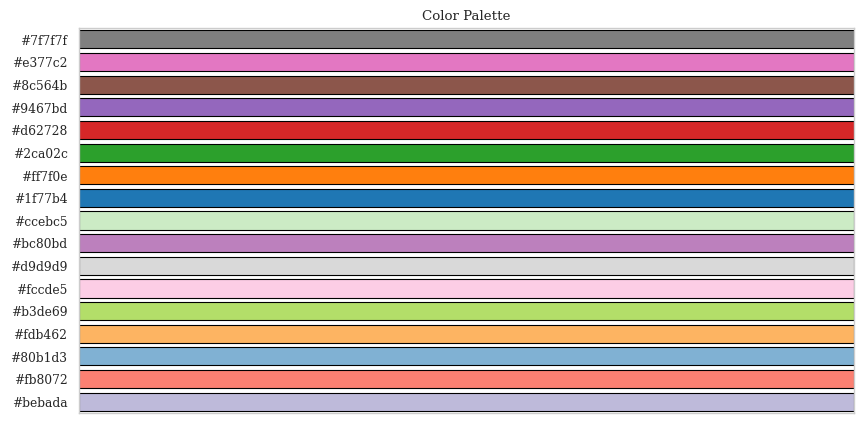

In [275]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Create horizontal bar chart with merged_colors
for i, color in enumerate(merged_colors):
    ax.barh(i, 1, color=color, edgecolor='black')

# Set x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Set y-axis ticks and labels
ax.set_yticks(range(len(merged_colors)))
hex_colors = ['#{:02x}{:02x}{:02x}'.format(int(color[0]*255), int(color[1]*255), int(color[2]*255)) for color in merged_colors]
ax.set_yticklabels(hex_colors)

# Set plot title and limits
ax.set_title('Color Palette')
ax.set_xlim([0, 1])
ax.set_ylim([-0.5, len(merged_colors)-0.5])

plt.show()


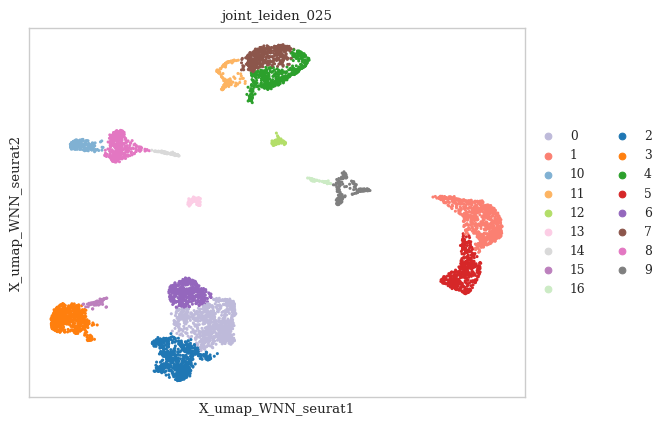

In [272]:
sc.pl.embedding(adata, basis="X_umap_WNN_seurat", color="joint_leiden_025")

In [278]:
adata.uns["manual_annotation_B_fine_colors"] = ['#80b1d3', '#e377c2','#d9d9d9', '#838B8B']
sc.pl.embedding(adata, basis="X_umap_WNN_seurat", color="manual_annotation_B_fine", 
                save="_B_subtypes.pdf")

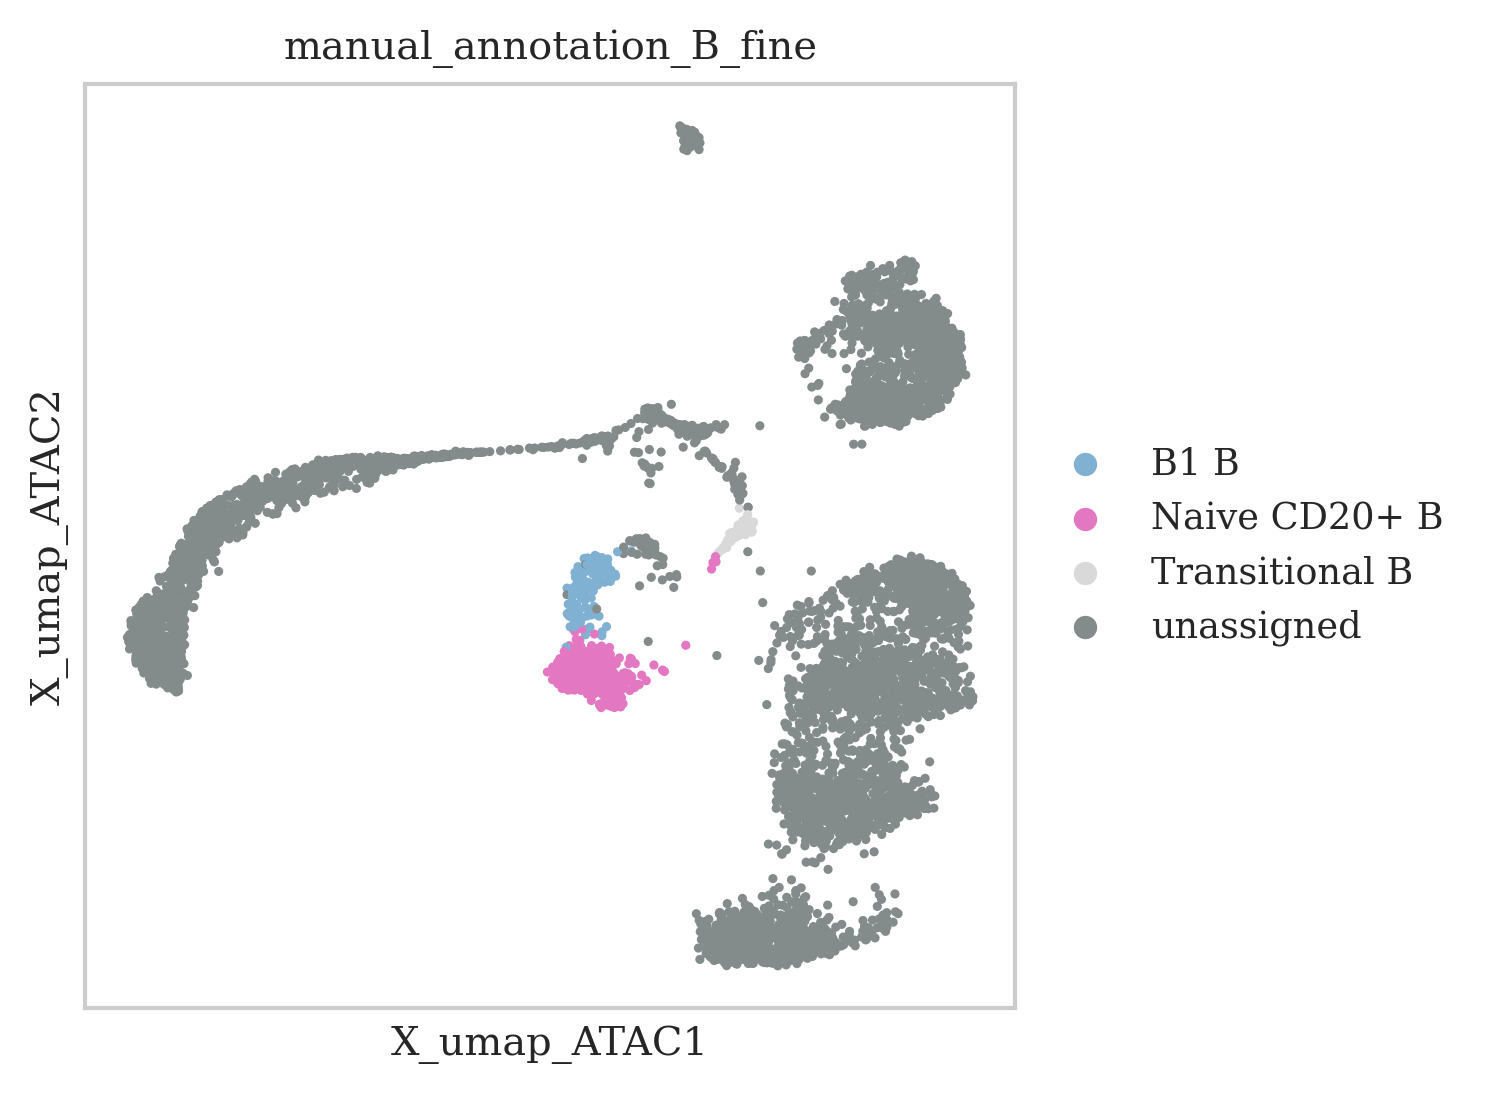

In [286]:
# ATAC UMAP with manual B cell subtype annotation
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="manual_annotation_B_fine")#, 
                    #save="_B_subtypes.pdf")

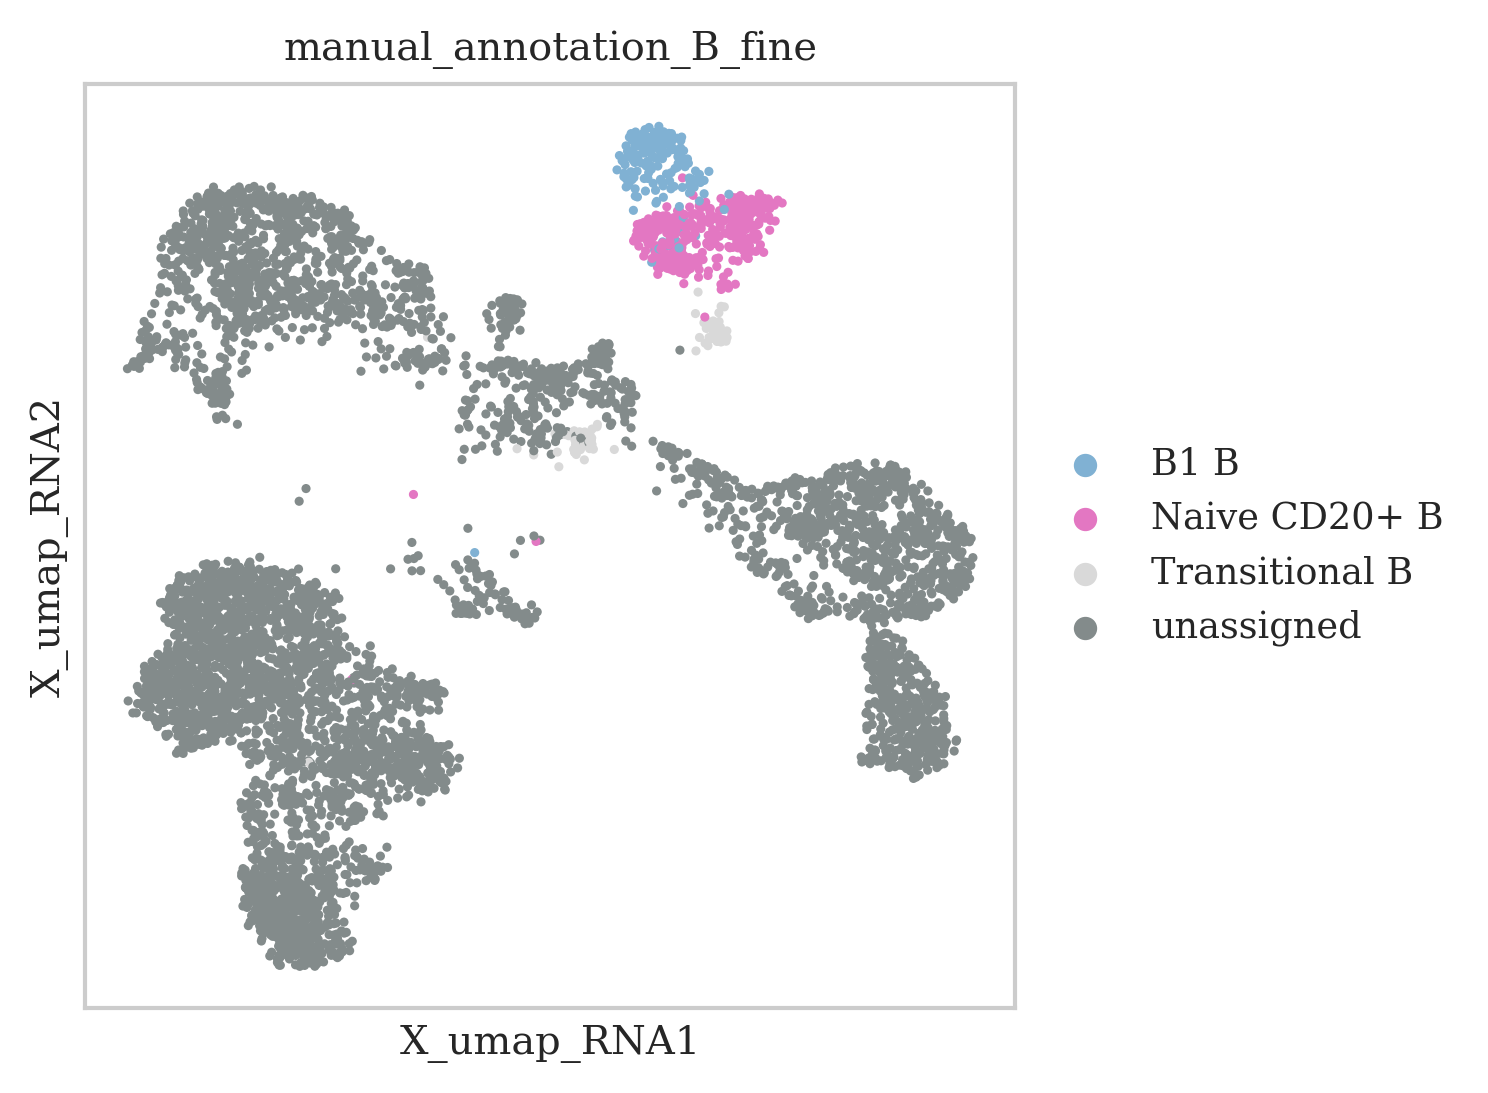

In [285]:
# RNA(GEX) UMAP with manual B cell subtype annotation
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="manual_annotation_B_fine")#, 
                    #save="_B_subtypes.pdf")

In [287]:
adata.write_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v5.h5ad")

# Cosine similarity between B cell subtypes

marker genes for B cell subtypes (RNA)

'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],

marker genes for B cell subtypes (ATAC)

'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
'Transitional B': ['MME', 'CD38', 'CD24'],
markers that I chose for visualization and further exploration

Naive CD20+ B: ["IL4R-RNA", "IGHD-RNA"]
B1 B: ["ITGB1-RNA", "SSPN-RNA"]
Transitional B: ["MME-RNA", "CD24-RNA"]

In [355]:
markers_RNA = {'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
                'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 
                         'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 
                         'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
                'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2']}

markers_ATAC = {'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
                'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
                'Transitional B': ['MME', 'CD38', 'CD24'],}

In [294]:
from sklearn.metrics.pairwise import cosine_similarity

# subset the B cell subtype populations
B1_B = adata[adata.obs["manual_annotation_B_fine"]=="B1 B"]
CD20_B = adata[adata.obs["manual_annotation_B_fine"]=="Naive CD20+ B"]
Trans_B = adata[adata.obs["manual_annotation_B_fine"]=="Transitional B"]


In [300]:
B1_B_RNA = B1_B[:, B1_B.var.assay=="RNA"]
B1_B_RNA

View of AnnData object with n_obs × n_vars = 178 × 17813
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap', 'joint_leiden_025_colors', 'manual_annotation_B_fine_colors'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

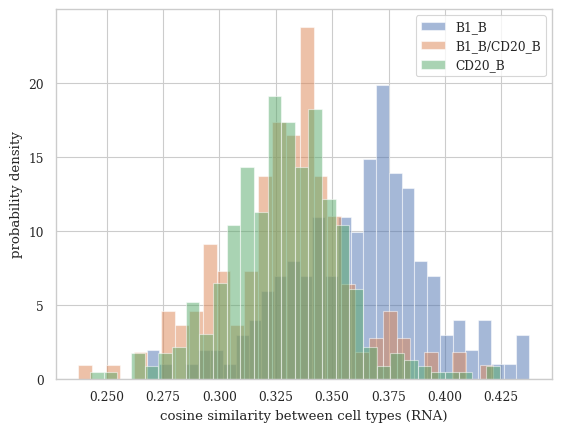

In [370]:
# Calculate cosine similarity using all the genes (RNA)

# subset the genes for RNA only using adata.var["assay"] field (RNA or ATAC)

# B1_B vs CD20+B
B1_B_RNA = B1_B[:, B1_B.var.assay=="RNA"]
CD20_B_RNA = CD20_B[:, CD20_B.var.assay=="RNA"]
Trans_B_RNA = Trans_B[:, CD20_B.var.assay=="RNA"]

# We are adding blank columns to make coloring in the plots more easily automated
# sim_B1B = pd.DataFrame(index=B1_B.obs.index,
#                        columns=['B1 B', 'B1 B - CD20+ Naive B', 'CD20+ Naive B'])

# sim_B1B['B1 B'] = cosine_similarity(B1_B_RNA.X, B1_B_RNA.X).mean(axis=1)
# sim_B1B['B1 B - CD20+ Naive B'] = cosine_similarity(B1_B_RNA.X, CD20_B_RNA.X).mean(axis=1)
# sim_B1B['CD20+ Naive B'] = cosine_similarity(CD20_B_RNA.X, CD20_B_RNA.X).mean(axis=1)

B1_B_cosine = cosine_similarity(B1_B_RNA.X, B1_B_RNA.X).mean(axis=1)
B1_B_CD20_B_cosine = cosine_similarity(B1_B_RNA.X, CD20_B_RNA.X).mean(axis=1)
CD20_B_cosine = cosine_similarity(CD20_B_RNA.X, CD20_B_RNA.X).mean(axis=1)

# Panel A
#bins = np.linspace(-0.2, 0.9, 30)
bins=30
# ax = axes[0,0]
plt.hist(B1_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(B1_B_CD20_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(CD20_B_cosine, alpha=0.5, bins=bins, density = True)

# ax.set_ylim(0, 14)
plt.xlabel('cosine similarity between cell types (RNA)')
plt.ylabel('probability density')
plt.legend(["B1_B", "B1_B/CD20_B","CD20_B"])
plt.savefig(figpath+"hist_cosine_sim_Bcells_whole_RNA.pdf")

In [318]:
B1_B[:, markers_RNA]

View of AnnData object with n_obs × n_vars = 178 × 23
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap', 'joint_leiden_025_colors', 'manual_annotation_B_fine_colors'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

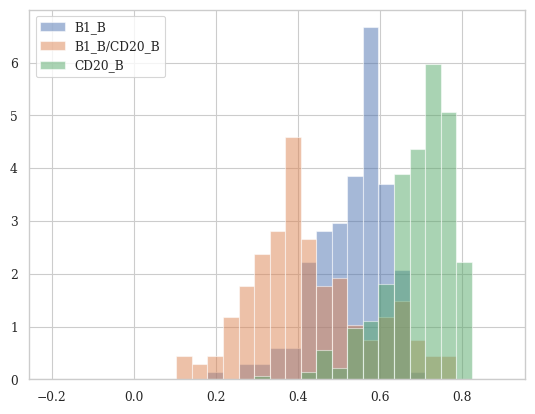

In [366]:
# Calculate cosine similarity using only the marker genes (RNA)

# subset for the marker genes only
# 'MS4A1' this is expressed highly for both B1 B and CD20+Naive B
# best marker set
# markers_RNA = ['IL4R', 'IGHD', 'FCRL1', 'IGHM', 
#                'SSPN', 'ITGB1', 'EPHA4', 'COL4A4']
markers_RNA = ['IL4R', 'IGHD', 'FCRL1', 'IGHM', 'MS4A1',
               'SSPN', 'ITGB1', 'EPHA4', 'COL4A4','PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK'] # - seem to be weak
               #'MME', 'CD38', 'CD24', 'ACSM3', 'MSI2']
markers_RNA = [x+"-RNA" for x in markers_RNA]

# B1_B vs CD20+B
B1_B_RNA = B1_B[:, markers_RNA]
CD20_B_RNA = CD20_B[:, markers_RNA]
Trans_B_RNA = Trans_B[:, markers_RNA]

# We are adding blank columns to make coloring in the plots more easily automated
# sim_B1B = pd.DataFrame(index=B1_B.obs.index,
#                        columns=['B1 B', 'B1 B - CD20+ Naive B', 'CD20+ Naive B'])

# sim_B1B['B1 B'] = cosine_similarity(B1_B_RNA.X, B1_B_RNA.X).mean(axis=1)
# sim_B1B['B1 B - CD20+ Naive B'] = cosine_similarity(B1_B_RNA.X, CD20_B_RNA.X).mean(axis=1)
# sim_B1B['CD20+ Naive B'] = cosine_similarity(CD20_B_RNA.X, CD20_B_RNA.X).mean(axis=1)

B1_B_cosine = cosine_similarity(B1_B_RNA.X, B1_B_RNA.X).mean(axis=1)
B1_B_CD20_B_cosine = cosine_similarity(B1_B_RNA.X, CD20_B_RNA.X).mean(axis=1)
CD20_B_cosine = cosine_similarity(CD20_B_RNA.X, CD20_B_RNA.X).mean(axis=1)

# Panel A
bins = np.linspace(-0.2, 0.9, 30)
#bins=30
# ax = axes[0,0]
plt.hist(B1_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(B1_B_CD20_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(CD20_B_cosine, alpha=0.5, bins=bins, density = True)

# ax.set_ylim(0, 14)
ax.set_xlabel('cosine similarity between cell types (RNA)')
ax.set_ylabel('probability density')
plt.legend(["B1_B", "B1_B/CD20_B","CD20_B"])
plt.savefig(figpath+"hist_cosine_sim_Bcells_markers_RNA.pdf")

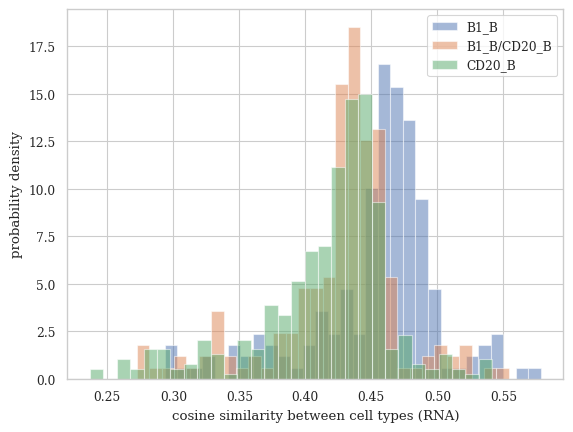

In [371]:
# Calculate cosine similarity using all the genes (ATAC)

# subset the genes for RNA only using adata.var["assay"] field (RNA or ATAC)

# B1_B vs CD20+B
B1_B_ATAC = B1_B[:, B1_B.var.assay=="ATAC"]
CD20_B_ATAC = CD20_B[:, CD20_B.var.assay=="ATAC"]
Trans_B_ATAC = Trans_B[:, CD20_B.var.assay=="ATAC"]

# We are adding blank columns to make coloring in the plots more easily automated
# sim_B1B = pd.DataFrame(index=B1_B.obs.index,
#                        columns=['B1 B', 'B1 B - CD20+ Naive B', 'CD20+ Naive B'])

# sim_B1B['B1 B'] = cosine_similarity(B1_B_RNA.X, B1_B_RNA.X).mean(axis=1)
# sim_B1B['B1 B - CD20+ Naive B'] = cosine_similarity(B1_B_RNA.X, CD20_B_RNA.X).mean(axis=1)
# sim_B1B['CD20+ Naive B'] = cosine_similarity(CD20_B_RNA.X, CD20_B_RNA.X).mean(axis=1)

B1_B_cosine = cosine_similarity(B1_B_ATAC.X, B1_B_ATAC.X).mean(axis=1)
B1_B_CD20_B_cosine = cosine_similarity(B1_B_ATAC.X, CD20_B_ATAC.X).mean(axis=1)
CD20_B_cosine = cosine_similarity(CD20_B_ATAC.X, CD20_B_ATAC.X).mean(axis=1)

#
#bins = np.linspace(-0.2, 0.9, 30)
bins=30
# ax = axes[0,0]
plt.hist(B1_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(B1_B_CD20_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(CD20_B_cosine, alpha=0.5, bins=bins, density = True)

# ax.set_ylim(0, 14)
plt.xlabel('cosine similarity between cell types (RNA)')
plt.ylabel('probability density')
plt.legend(["B1_B", "B1_B/CD20_B","CD20_B"])
plt.savefig(figpath+"hist_cosine_sim_Bcells_whole_ATAC.pdf")

In [325]:
B1_B_ATAC

View of AnnData object with n_obs × n_vars = 178 × 10
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse', 'joint_leiden_015', 'joint_leiden_05', 'joint_leiden_025', 'manual_annotation_B_fine'
    var: 'assay'
    uns: 'ATAC_leiden_015_colors', 'GEX_leiden_015_colors', 'cell_type_colors', 'joint_leiden_015_colors', 'joint_leiden_05_colors', 'leiden', 'neighbors', 'pca', 'umap', 'joint_leiden_025_colors', 'manual_annotation_B_fine_colors'
    obsm: 'X_pca', 'X_pca_RNA', 'X_umap', 'X_umap_ATAC', 'X_umap_RNA', 'X_umap_WNN_muon', 'X_umap_WNN_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

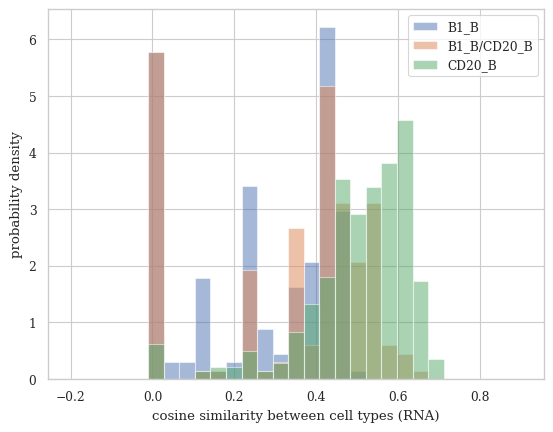

In [368]:
# Calculate cosine similarity using the ATAC marker genes

# subset for the marker genes only
markers_ATAC = ["ARRDC4","ZNF667","YBX3",
                "IRS2","ZNF471","VAV3","MAML3"]#,
                #"MYADM","ZNF516","XYLT1","ZFP28","SPART"]
#['MS4A1', 'LYN', 'CD74', 'BLK',
#                'ITGB1', 'DUSP22', 'EPHA4',
#                'MME', 'CD38', 'CD24']
markers_ATAC = [x+"-ATAC" for x in markers_ATAC]

# B1_B vs CD20+B
B1_B_ATAC = B1_B[:, markers_ATAC]
CD20_B_ATAC = CD20_B[:, markers_ATAC]
Trans_B_ATAC = Trans_B[:, markers_ATAC]

# We are adding blank columns to make coloring in the plots more easily automated
# sim_B1B = pd.DataFrame(index=B1_B.obs.index,
#                        columns=['B1 B', 'B1 B - CD20+ Naive B', 'CD20+ Naive B'])

# sim_B1B['B1 B'] = cosine_similarity(B1_B_RNA.X, B1_B_RNA.X).mean(axis=1)
# sim_B1B['B1 B - CD20+ Naive B'] = cosine_similarity(B1_B_RNA.X, CD20_B_RNA.X).mean(axis=1)
# sim_B1B['CD20+ Naive B'] = cosine_similarity(CD20_B_RNA.X, CD20_B_RNA.X).mean(axis=1)

B1_B_cosine = cosine_similarity(B1_B_ATAC.X, B1_B_ATAC.X).mean(axis=1)
B1_B_CD20_B_cosine = cosine_similarity(B1_B_ATAC.X, CD20_B_ATAC.X).mean(axis=1)
CD20_B_cosine = cosine_similarity(CD20_B_ATAC.X, CD20_B_ATAC.X).mean(axis=1)

#
bins = np.linspace(-0.2, 0.9, 30)
#bins=30
# ax = axes[0,0]
plt.hist(B1_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(B1_B_CD20_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(CD20_B_cosine, alpha=0.5, bins=bins, density = True)

# ax.set_ylim(0, 14)
plt.xlabel('cosine similarity between cell types (RNA)')
plt.ylabel('probability density')
plt.legend(["B1_B", "B1_B/CD20_B","CD20_B"])
plt.savefig(figpath+"hist_cosine_sim_Bcells_markers_ATAC.pdf")

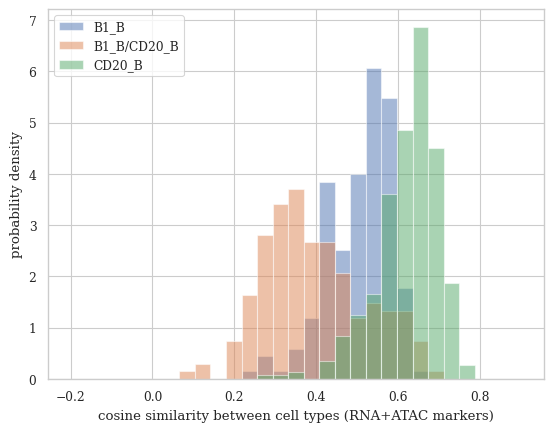

In [369]:
# Calculate cosine similarity using both the RNA and ATAC marker genes

# subset for the marker genes only


# B1_B vs CD20+B
B1_B_markers = B1_B[:, markers_RNA+markers_ATAC]
CD20_B_markers = CD20_B[:, markers_RNA+markers_ATAC]
Trans_B_markers = Trans_B[:, markers_RNA+markers_ATAC]

# We are adding blank columns to make coloring in the plots more easily automated
# sim_B1B = pd.DataFrame(index=B1_B.obs.index,
#                        columns=['B1 B', 'B1 B - CD20+ Naive B', 'CD20+ Naive B'])

# sim_B1B['B1 B'] = cosine_similarity(B1_B_RNA.X, B1_B_RNA.X).mean(axis=1)
# sim_B1B['B1 B - CD20+ Naive B'] = cosine_similarity(B1_B_RNA.X, CD20_B_RNA.X).mean(axis=1)
# sim_B1B['CD20+ Naive B'] = cosine_similarity(CD20_B_RNA.X, CD20_B_RNA.X).mean(axis=1)

B1_B_cosine = cosine_similarity(B1_B_markers.X, B1_B_markers.X).mean(axis=1)
B1_B_CD20_B_cosine = cosine_similarity(B1_B_markers.X, CD20_B_markers.X).mean(axis=1)
CD20_B_cosine = cosine_similarity(CD20_B_markers.X, CD20_B_markers.X).mean(axis=1)

#
bins = np.linspace(-0.2, 0.9, 30)
#bins=30
# ax = axes[0,0]
plt.hist(B1_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(B1_B_CD20_B_cosine, alpha=0.5, bins=bins, density = True)
plt.hist(CD20_B_cosine, alpha=0.5, bins=bins, density = True)

# ax.set_ylim(0, 14)
plt.xlabel('cosine similarity between cell types (RNA+ATAC markers)')
plt.ylabel('probability density')
plt.legend(["B1_B", "B1_B/CD20_B","CD20_B"])
plt.savefig(figpath+"hist_cosine_sim_Bcells_markers_RNA_ATAC.pdf")